#**IMPORTING LIBRARIES & BASIC CHANGES TO DATA**  



In [ ]:
!pip install -U scikit-learn
!pip install catboost
!pip install optuna
!pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import optuna
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_iris
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import warnings
from sklearn.preprocessing import StandardScaler
import random
from sklearn.preprocessing import TargetEncoder
from sklearn import base
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from collections import OrderedDict
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

warnings.filterwarnings("ignore")

In [ ]:
import logging
import time
import warnings

import catboost as cb
import joblib
import lightgbm as lgbm
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
import xgboost as xgb
from optuna.samplers import TPESampler
from sklearn.compose import (
    ColumnTransformer,
    make_column_selector,
    make_column_transformer,
)
from sklearn.impute import SimpleImputer
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

logging.basicConfig(
    format="%(asctime)s - %(message)s", datefmt="%d-%b-%y %H:%M:%S", level=logging.INFO
)

warnings.filterwarnings("ignore")

In [ ]:
bowler_data=pd.read_csv("/content/663e2b2c60743_bowler_level_scorecard.csv")
batsman_data=pd.read_csv("/content/663e2b548c98c_batsman_level_scorecard.csv")
match_data=pd.read_csv("/content/664389efa0868_match_level_scorecard.csv")
train1=pd.read_csv("/content/663e2b6d54457_train_data_with_samplefeatures.csv")
train2=pd.read_csv("/content/6644a1e287df6_test_data_with_samplefeatures.csv")
template1=pd.read_csv("/content/submission_template_file1.csv")
template2=pd.read_csv("/content/submission_template_file2.csv")

In [ ]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3=pd.DataFrame()

df1['toss decision']=match_data['toss decision']
df1['venue']=match_data['venue']
df1['city']=match_data['city']
df1['lighting']=match_data['lighting']
df1['ground_id']=match_data['ground_id']
df1['season']=match_data['season']

df2['toss decision']=train1['toss decision']
df2['venue']=train1['venue']
df2['city']=train1['city']
df2['lighting']=train1['lighting']
df2['ground_id']=train1['ground_id']
df2['season']=train1['season']

df3['toss decision']=train2['toss decision']
df3['venue']=train2['venue']
df3['city']=train2['city']
df3['lighting']=train2['lighting']
df3['ground_id']=train2['ground_id']
df3['season']=train2['season']

In [ ]:
match_data=match_data.drop('series_name',axis="columns")
train2=train2.drop('series_name',axis="columns")
train1=train1.drop('series_name',axis="columns")

In [ ]:
vertical_concat = pd.concat([df1, df2,df3], axis=0)

le1=LabelEncoder()
le1.fit(vertical_concat['toss decision'])
match_data['toss decision']=le1.transform(match_data['toss decision'])
train1['toss decision']=le1.transform(train1['toss decision'])
train2['toss decision']=le1.transform(train2['toss decision'])


le2=LabelEncoder()
le2.fit(vertical_concat['venue'])
match_data['venue']=le2.transform(match_data['venue'])
train1['venue']=le2.transform(train1['venue'])

le3=LabelEncoder()
le3.fit(vertical_concat[ 'city'])
match_data[ 'city']=le3.transform(match_data[ 'city'])
train1[ 'city']=le3.transform(train1[ 'city'])

le4=LabelEncoder()
le4.fit(vertical_concat['lighting'])
match_data['lighting']=le4.transform(match_data['lighting'])
train1['lighting']=le4.transform(train1['lighting'])
train2['lighting']=le4.transform(train2['lighting'])

le6=LabelEncoder()
le6.fit(vertical_concat['season'])
match_data['season']=le6.transform(match_data['season'])
train1['season']=le6.transform(train1['season'])
train2['season']=le6.transform(train2['season'])

le7=LabelEncoder()
le7.fit(vertical_concat['ground_id'])
match_data['ground_id']=le7.transform(match_data['ground_id'])
train1['ground_id']=le7.transform(train1['ground_id'])
train2['ground_id']=le7.transform(train2['ground_id'])

# **EDA**

### **BOWLER** **EDA**

In [ ]:
r,c=bowler_data.shape
bowler_data['bowler_hand']=""
bowler_data['bowler_arm']=""
bowler_data['bowler_style']=""
for i in range(r):
    x=bowler_data['bowler_details'][i].split()
    if(len(x)>0):
        y=x[0].split(':')
        if(len(y)>1):
            bowler_data['bowler_hand'][i]=y[1]
    if(len(x)>1):
        y=x[1].split(':')
        if(len(y)>1):
            bowler_data['bowler_arm'][i]=y[1]
        else:
            bowler_data['bowler_arm'][i]="no"

    if(len(x)>2):
        bowler_data['bowler_style'][i]=x[2]


In [ ]:
le = LabelEncoder()
le.fit(bowler_data["bowler_hand"])
bowler_data["bowler_hand"]=le.transform(bowler_data["bowler_hand"])
le = LabelEncoder()
le.fit(bowler_data["bowler_arm"])
bowler_data["bowler_arm"]=le.transform(bowler_data["bowler_arm"])
le = LabelEncoder()
le.fit(bowler_data["bowler_style"])
bowler_data["bowler_style"]=le.transform(bowler_data["bowler_style"])
bowler_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match id           18539 non-null  int64  
 1   bowler             18539 non-null  object 
 2   bowler_id          18539 non-null  float64
 3   bowler_details     18539 non-null  object 
 4   is_bowler_captain  18539 non-null  float64
 5   is_bowler_keeper   18539 non-null  float64
 6   inning             18539 non-null  int64  
 7   runs               18539 non-null  int64  
 8   wicket_count       18539 non-null  int64  
 9   balls_bowled       18539 non-null  int64  
 10  economy            18539 non-null  float64
 11  maiden             18539 non-null  int64  
 12  dots               18539 non-null  float64
 13  Fours              18539 non-null  int64  
 14  Sixes              18539 non-null  int64  
 15  wides              18539 non-null  int64  
 16  noballs            185

In [ ]:
bowler_data.head()

,match id,bowler,bowler_id,bowler_details,is_bowler_captain,is_bowler_keeper,inning,runs,wicket_count,balls_bowled,...,maiden,dots,Fours,Sixes,wides,noballs,match_dt,bowler_hand,bowler_arm,bowler_style
0,8638034,BV Ss,6718396.0,NZ:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,21,0,12,...,0,3.0,1,1,3,1,2021-01-01,2,4,5
1,8638034,HK Bt,1585464.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,1,34,1,24,...,0,7.0,3,1,2,0,2021-01-01,0,4,5
2,8638034,JS Nm,2486896.0,NZ:Left-hand bat:Right-arm medium-fast:,0.0,0.0,1,23,2,24,...,0,12.0,1,1,0,0,2021-01-01,0,4,5
3,8638034,LV vn Bk,3083667.0,NED:Right-hand bat:Right-arm medium-fast:,0.0,0.0,1,31,1,24,...,0,9.0,4,0,2,0,2021-01-01,2,4,5
4,8638034,PF Yd,4950294.0,NZ:Right-hand bat:Legbreak googly:,0.0,0.0,1,21,1,24,...,0,8.0,0,0,1,0,2021-01-01,2,2,3


In [ ]:
#ek baar hi run karna
cols=['bowler','bowler_details']
bowler_data=bowler_data.drop(cols,axis="columns")
bowler_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match id           18539 non-null  int64  
 1   bowler_id          18539 non-null  float64
 2   is_bowler_captain  18539 non-null  float64
 3   is_bowler_keeper   18539 non-null  float64
 4   inning             18539 non-null  int64  
 5   runs               18539 non-null  int64  
 6   wicket_count       18539 non-null  int64  
 7   balls_bowled       18539 non-null  int64  
 8   economy            18539 non-null  float64
 9   maiden             18539 non-null  int64  
 10  dots               18539 non-null  float64
 11  Fours              18539 non-null  int64  
 12  Sixes              18539 non-null  int64  
 13  wides              18539 non-null  int64  
 14  noballs            18539 non-null  int64  
 15  match_dt           18539 non-null  object 
 16  bowler_hand        185

In [ ]:
bowler_data.describe()

,match id,bowler_id,is_bowler_captain,is_bowler_keeper,inning,runs,wicket_count,balls_bowled,economy,maiden,dots,Fours,Sixes,wides,noballs,bowler_hand,bowler_arm,bowler_style
count,1.853900e+04,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,9.102037e+06,4.417985e+06,0.063811,0.000054,1.494201,25.084147,0.997896,18.747505,8.367395,0.033605,7.043314,2.100005,0.943632,0.629700,0.081018,1.492206,3.473866,3.849830
std,3.201571e+05,2.444409e+06,0.244423,0.007344,0.499980,10.835197,1.050482,6.221394,3.260218,0.186972,3.840311,1.605844,1.073823,0.937492,0.314390,0.870317,1.271192,2.465316
min,8.587795e+06,3.406100e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.778755e+06,2.533666e+06,0.000000,0.000000,1.000000,17.000000,0.000000,12.000000,6.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,9.085012e+06,4.001934e+06,0.000000,0.000000,1.000000,25.000000,1.000000,20.000000,8.000000,0.000000,7.000000,2.000000,1.000000,0.000000,0.000000,2.000000,4.000000,4.000000
75%,9.388539e+06,6.487970e+06,0.000000,0.000000,2.000000,32.000000,2.000000,24.000000,10.000000,0.000000,10.000000,3.000000,1.000000,1.000000,0.000000,2.000000,4.000000,6.000000
max,9.887863e+06,9.888584e+06,1.000000,1.000000,2.000000,77.000000,6.000000,25.000000,36.000000,3.000000,24.000000,11.000000,9.000000,8.000000,5.000000,2.000000,6.000000,11.000000


In [ ]:
bowler_data.isnull().sum()

match id             0
bowler_id            0
is_bowler_captain    0
is_bowler_keeper     0
inning               0
runs                 0
wicket_count         0
balls_bowled         0
economy              0
maiden               0
dots                 0
Fours                0
Sixes                0
wides                0
noballs              0
match_dt             0
bowler_hand          0
bowler_arm           0
bowler_style         0
dtype: int64

In [ ]:
bowler_data.nunique()

match id             1689
bowler_id            1541
is_bowler_captain       2
is_bowler_keeper        2
inning                  2
runs                   74
wicket_count            7
balls_bowled           25
economy               463
maiden                  4
dots                   24
Fours                  12
Sixes                  10
wides                   9
noballs                 6
match_dt              741
bowler_hand             3
bowler_arm              7
bowler_style           12
dtype: int64

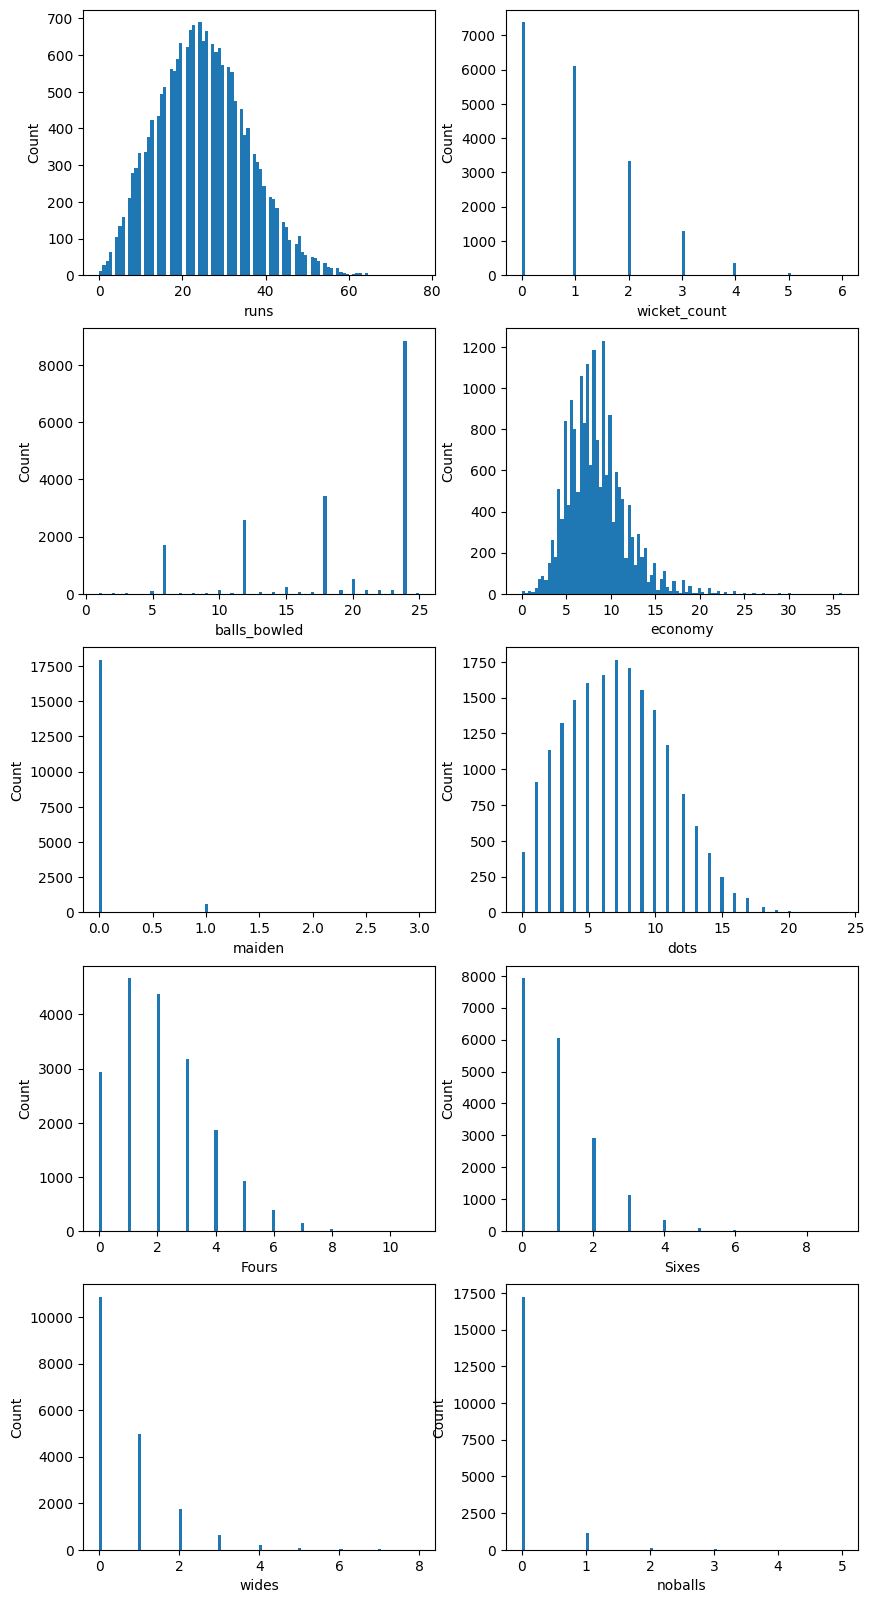

In [ ]:
cols=[ 'runs','wicket_count', 'balls_bowled', 'economy', 'maiden', 'dots', 'Fours','Sixes', 'wides', 'noballs']
fig = plt.figure()
fig.set_size_inches(10, 20)
for i in range(len(cols)):
    plt.subplot(5,len(cols)//5,i+1)
    plt.hist(bowler_data[cols[i]],100)
    plt.xlabel(cols[i])
    plt.ylabel('Count')
plt.show()

### **BATSMAN** **EDA**

In [ ]:
le = LabelEncoder()
le.fit(batsman_data['wicket kind'])
batsman_data['wicket kind']=le.transform(batsman_data['wicket kind'])

In [ ]:
r,c=batsman_data.shape
batsman_data['batsman_hand']=""
batsman_data['batsman_arm']=""
batsman_data['batsman_styl']=""
for i in range(r):
    x=batsman_data['batsman_details'][i].split()
    if(len(x)>0):
        y=x[0].split(':')
        if(len(y)>1):
            batsman_data['batsman_hand'][i]=y[1]
    if(len(x)>1):
        y=x[1].split(':')
        if(len(y)>1):
            batsman_data['batsman_arm'][i]=y[1]
    if(len(x)>2):
        batsman_data['batsman_styl'][i]=x[2]

In [ ]:
r,c=batsman_data.shape
batsman_data['bowler_hand']=""
batsman_data['bowler_arm']=""
batsman_data['bowler_styl']=""
for i in range(r):
    if pd.isnull(batsman_data['bowler_details'][i]) :
        continue
    x=batsman_data['bowler_details'][i].split()
    if(len(x)>0):
        y=x[0].split(':')
        if(len(y)>1):
            batsman_data['bowler_hand'][i]=y[1]
    if(len(x)>1):
        y=x[1].split(':')
        if(len(y)>1):
            batsman_data['bowler_arm'][i]=y[1]
    if(len(x)>2):
        batsman_data['bowler_styl'][i]=x[2]




In [ ]:
le = LabelEncoder()
le.fit(batsman_data['bowler_hand'])
batsman_data['bowler_hand']=le.transform(batsman_data['bowler_hand'])
le = LabelEncoder()
le.fit(batsman_data['bowler_arm'])
batsman_data['bowler_arm']=le.transform(batsman_data['bowler_arm'])
le = LabelEncoder()
le.fit(batsman_data['bowler_styl'])
batsman_data['bowler_style']=le.transform(batsman_data['bowler_styl'])

le = LabelEncoder()
le.fit(batsman_data['batsman_hand'])
batsman_data['batsman_hand']=le.transform(batsman_data['batsman_hand'])
le = LabelEncoder()
le.fit(batsman_data['batsman_arm'])
batsman_data['batsman_arm']=le.transform(batsman_data['batsman_arm'])
le = LabelEncoder()
le.fit(batsman_data['batsman_styl'])
batsman_data['batsman_style']=le.transform(batsman_data['batsman_styl'])

batsman_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24483 entries, 0 to 24482
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match id            24483 non-null  int64  
 1   batsman             24483 non-null  object 
 2   batsman_id          24483 non-null  float64
 3   batsman_details     24483 non-null  object 
 4   is_batsman_captain  24483 non-null  float64
 5   is_batsman_keeper   24483 non-null  float64
 6   inning              24483 non-null  int64  
 7   runs                24483 non-null  int64  
 8   balls_faced         24483 non-null  int64  
 9   over_faced_first    24483 non-null  float64
 10  wicket kind         24483 non-null  int64  
 11  out_by_bowler       19155 non-null  object 
 12  out_by_fielder      13838 non-null  object 
 13  bowler_id           18128 non-null  float64
 14  bowler_details      18128 non-null  object 
 15  is_bowler_keeper    18698 non-null  float64
 16  is_b

In [ ]:
cols=[ 'bowler_styl', 'batsman_styl','batsman','bowler_details','batsman_details','out_by_bowler','out_by_fielder']
batsman_data=batsman_data.drop(cols,axis='columns')


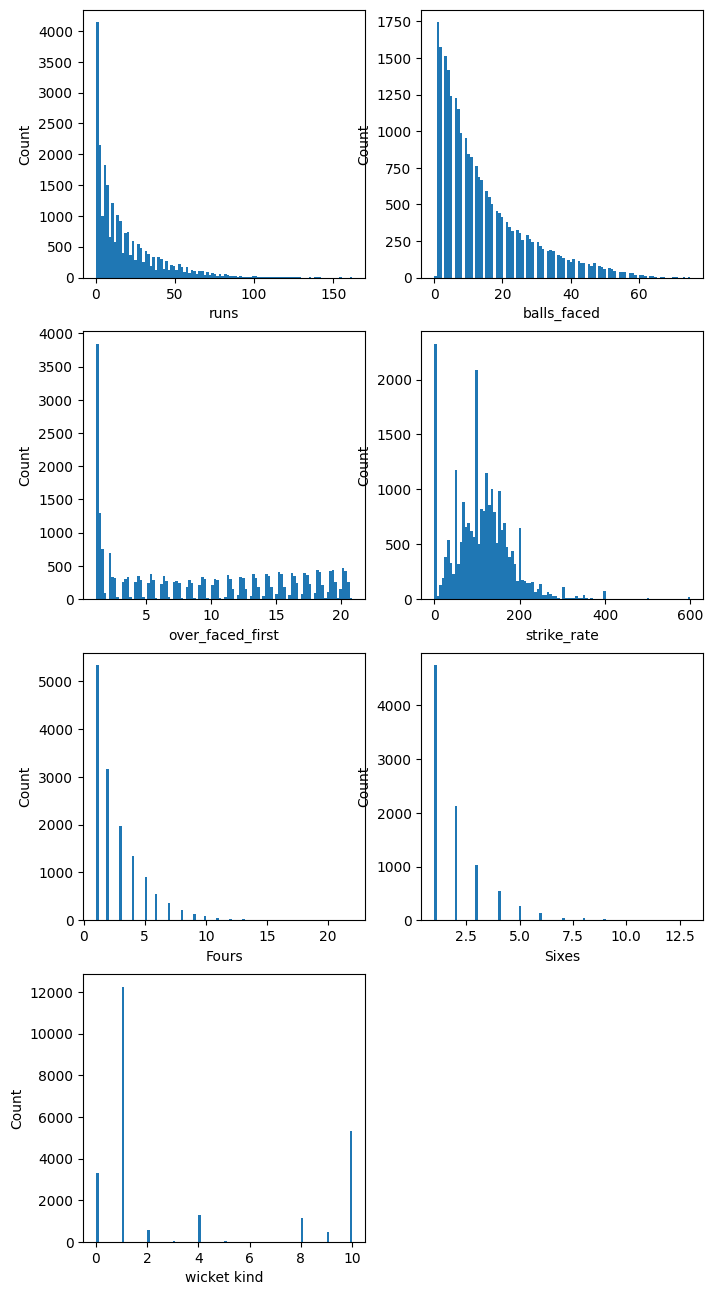

In [ ]:
cols=[ 'runs','balls_faced', 'over_faced_first','strike_rate', 'Fours', 'Sixes','wicket kind']
fig = plt.figure()
fig.set_size_inches(8, 16)
for i in range(len(cols)):
    plt.subplot(4,len(cols)//3,i+1)
    plt.hist(batsman_data[cols[i]],100)
    plt.xlabel(cols[i])
    plt.ylabel('Count')
plt.show()

In [ ]:
batsman_data.describe()

,match id,batsman_id,is_batsman_captain,is_batsman_keeper,inning,runs,balls_faced,over_faced_first,wicket kind,bowler_id,...,is_bowler_captain,strike_rate,Fours,Sixes,batsman_hand,batsman_arm,bowler_hand,bowler_arm,bowler_style,batsman_style
count,2.448300e+04,2.448300e+04,24483.000000,24483.000000,24483.000000,24483.000000,24483.000000,24483.000000,24483.000000,1.812800e+04,...,18128.000000,24474.000000,14200.000000,8994.000000,24483.000000,24483.000000,24483.000000,24483.000000,24483.000000,24483.000000
mean,9.105542e+06,4.129075e+06,0.113957,0.113589,1.490136,18.296491,14.140383,9.192093,3.503942,4.368210e+06,...,0.056873,110.319366,2.731056,1.951523,1.433975,3.589593,1.868072,2.513417,2.630519,4.814484
std,3.187236e+05,2.435776e+06,0.317765,0.317318,0.499913,20.251578,12.774643,6.785681,3.952688,2.379752e+06,...,0.231607,68.869285,2.142437,1.410311,0.900671,0.966438,1.327105,1.862726,2.576116,3.145216
min,8.587795e+06,3.146400e+04,0.000000,0.000000,1.000000,0.000000,0.000000,1.100000,0.000000,3.406100e+04,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.778825e+06,2.231928e+06,0.000000,0.000000,1.000000,3.000000,4.000000,2.100000,1.000000,2.538983e+06,...,0.000000,64.290000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000
50%,9.085075e+06,3.729970e+06,0.000000,0.000000,1.000000,11.000000,10.000000,8.500000,1.000000,3.913475e+06,...,0.000000,108.330000,2.000000,1.000000,2.000000,4.000000,3.000000,4.000000,2.000000,6.000000
75%,9.407600e+06,6.095508e+06,0.000000,0.000000,2.000000,27.000000,20.000000,15.500000,8.000000,6.399210e+06,...,0.000000,150.000000,4.000000,2.000000,2.000000,4.000000,3.000000,4.000000,5.000000,8.000000
max,9.887863e+06,9.883250e+06,1.000000,1.000000,2.000000,162.000000,75.000000,20.900000,10.000000,9.888584e+06,...,1.000000,600.000000,22.000000,13.000000,2.000000,5.000000,3.000000,5.000000,10.000000,11.000000


In [ ]:
batsman_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24483 entries, 0 to 24482
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match id            24483 non-null  int64  
 1   batsman_id          24483 non-null  float64
 2   is_batsman_captain  24483 non-null  float64
 3   is_batsman_keeper   24483 non-null  float64
 4   inning              24483 non-null  int64  
 5   runs                24483 non-null  int64  
 6   balls_faced         24483 non-null  int64  
 7   over_faced_first    24483 non-null  float64
 8   wicket kind         24483 non-null  int64  
 9   bowler_id           18128 non-null  float64
 10  is_bowler_keeper    18698 non-null  float64
 11  is_bowler_captain   18128 non-null  float64
 12  strike_rate         24474 non-null  float64
 13  Fours               14200 non-null  float64
 14  Sixes               8994 non-null   float64
 15  match_dt            24483 non-null  object 
 16  bats

In [ ]:
batsman_data["strike_rate"].fillna(0, inplace = True)
batsman_data["Fours"].fillna(0, inplace = True)
batsman_data["Sixes"].fillna(0, inplace = True)
#strike rate ,fours and sixes ko zero karo
batsman_data.isnull().sum()


match id                 0
batsman_id               0
is_batsman_captain       0
is_batsman_keeper        0
inning                   0
runs                     0
balls_faced              0
over_faced_first         0
wicket kind              0
bowler_id             6355
is_bowler_keeper      5785
is_bowler_captain     6355
strike_rate              0
Fours                    0
Sixes                    0
match_dt                 0
batsman_hand             0
batsman_arm              0
bowler_hand              0
bowler_arm               0
bowler_style             0
batsman_style            0
dtype: int64

In [ ]:
batsman_data.nunique()

match id              1689
batsman_id            2118
is_batsman_captain       2
is_batsman_keeper        2
inning                   2
runs                   134
balls_faced             72
over_faced_first       168
wicket kind             11
bowler_id             1210
is_bowler_keeper         1
is_bowler_captain        2
strike_rate           1438
Fours                   19
Sixes                   14
match_dt               741
batsman_hand             3
batsman_arm              6
bowler_hand              4
bowler_arm               6
bowler_style            11
batsman_style           12
dtype: int64

### **MATCH EDA**

In [ ]:
match_data=pd.get_dummies(match_data, prefix="by", prefix_sep='_', dummy_na=False, columns=['by'])
match_data['by']=0+match_data['by_runs']
#0 yaani ke jo team chase kar rahi thi woh jeeti
#1 yaani ke jo team pehle bat kari woh jeeti
match_data=pd.get_dummies(match_data, prefix="s", prefix_sep='_', dummy_na=False, columns=['series_type'])
match_data['series_type']=0+match_data['s_international']+2*match_data['s_other_domestic']
#0 for In Pr Le
#1 for international
#2 for other domestic


In [ ]:
match_data['toss_winner_id']=0
r,c=match_data.shape

for i in range(r):
    if(match_data['toss winner'][i]==match_data['team1'][i]):
        match_data['toss_winner_id'][i]=match_data['team1_id'][i]
    else:
        match_data['toss_winner_id'][i]=match_data['team2_id'][i]

In [ ]:
#maybe umpires ko hotcode karne se bhad jaye accuracy
cols=['toss winner','umpire1','umpire2','venue','city','team1','team2','winner','by_runs', 'by_wickets','s_In Pr Le', 's_international', 's_other_domestic']
match_data = match_data.drop(cols, axis='columns')

In [ ]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match id                1689 non-null   int64  
 1   win amount              1689 non-null   float64
 2   toss decision           1689 non-null   int64  
 3   match_dt                1689 non-null   object 
 4   lighting                1689 non-null   int64  
 5   season                  1689 non-null   int64  
 6   ground_id               1689 non-null   int64  
 7   inning1_runs            1689 non-null   int64  
 8   inning1_wickets         1689 non-null   int64  
 9   inning1_balls           1689 non-null   int64  
 10  inning2_runs            1689 non-null   float64
 11  inning2_wickets         1689 non-null   float64
 12  inning2_balls           1689 non-null   float64
 13  team1_id                1689 non-null   int64  
 14  team1_roster_ids        1689 non-null   

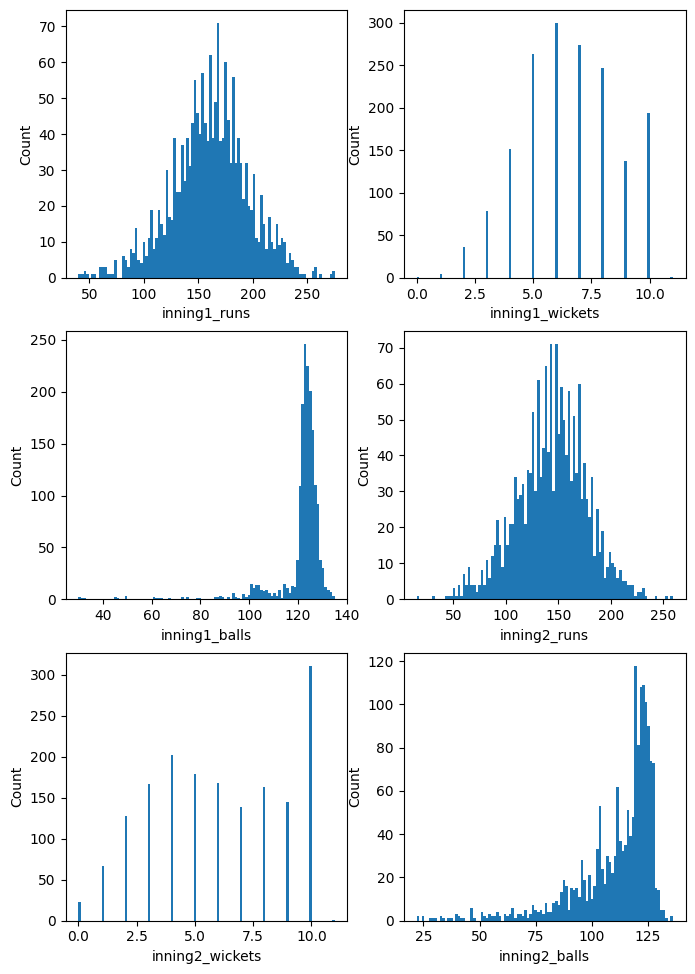

In [ ]:
cols=['inning1_runs', 'inning1_wickets', 'inning1_balls', 'inning2_runs','inning2_wickets', 'inning2_balls']
fig = plt.figure()
fig.set_size_inches(8, 16)
for i in range(len(cols)):
    plt.subplot(4,len(cols)//3,i+1)
    plt.hist(match_data[cols[i]],100)
    plt.xlabel(cols[i])
    plt.ylabel('Count')
plt.show()

In [ ]:
match_data.isnull().sum()

match id                    0
win amount                  0
toss decision               0
match_dt                    0
lighting                    0
season                      0
ground_id                   0
inning1_runs                0
inning1_wickets             0
inning1_balls               0
inning2_runs                0
inning2_wickets             0
inning2_balls               0
team1_id                    0
team1_roster_ids            0
team2_id                    0
team2_roster_ids            0
winner_id                   0
player_of_the_match_id    514
by                          0
series_type                 0
toss_winner_id              0
dtype: int64

In [ ]:
match_data.nunique()

match id                  1689
win amount                 127
toss decision                2
match_dt                   741
lighting                     3
season                       7
ground_id                  151
inning1_runs               190
inning1_wickets             12
inning1_balls               62
inning2_runs               180
inning2_wickets             12
inning2_balls               99
team1_id                   167
team1_roster_ids          1657
team2_id                   168
team2_roster_ids          1642
winner_id                  161
player_of_the_match_id     526
by                           2
series_type                  3
toss_winner_id             169
dtype: int64

### **TRAIN EDA**

In [ ]:
train1['toss_winner_id']=0
r,c=train1.shape

for i in range(r):
    if(train1['toss winner'][i]==train1['team1'][i]):
        train1['toss_winner_id'][i]=train1['team1_id'][i]
    else:
        train1['toss_winner_id'][i]=train1['team2_id'][i]

In [ ]:
train1=train1.drop(["team1","team2","toss winner","city","venue","winner"],axis="columns")

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   match id                   948 non-null    int64  
 1   team1_id                   948 non-null    int64  
 2   team1_roster_ids           948 non-null    object 
 3   team2_id                   948 non-null    int64  
 4   team2_roster_ids           948 non-null    object 
 5   winner_id                  948 non-null    int64  
 6   toss decision              948 non-null    int64  
 7   match_dt                   948 non-null    object 
 8   lighting                   948 non-null    int64  
 9   season                     948 non-null    int64  
 10  ground_id                  948 non-null    int64  
 11  team_count_50runs_last15   948 non-null    float64
 12  team_winp_last5            948 non-null    float64
 13  team1only_avg_runs_last15  927 non-null    float64

In [ ]:
train1.describe()

,match id,team1_id,team2_id,winner_id,toss decision,lighting,season,ground_id,team_count_50runs_last15,team_winp_last5,team1only_avg_runs_last15,team1_winp_team2_last15,ground_avg_runs_last15,toss_winner_id
count,9.480000e+02,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,927.000000,948.000000,895.000000,948.000000
mean,9.323234e+06,21921.722574,21768.040084,21722.776371,0.650844,1.098101,3.886076,59.856540,1.202602,4.904243,161.578491,40.991561,153.822446,21900.892405
std,2.302622e+05,17657.672717,17555.597707,17596.249007,0.476955,0.857218,1.156998,42.639305,1.008793,15.839620,14.449746,37.948831,13.971631,17601.324707
min,8.797053e+06,20.000000,20.000000,20.000000,0.000000,0.000000,2.000000,0.000000,0.083333,0.009901,103.000000,0.000000,81.500000,20.000000
25%,9.097078e+06,6838.000000,7258.000000,7258.000000,0.000000,0.000000,3.000000,19.000000,0.686678,0.603960,153.400000,0.000000,145.381818,7258.000000
50%,9.330600e+06,18360.000000,17982.000000,17863.000000,1.000000,1.000000,4.000000,55.000000,1.000000,1.000000,163.125000,40.000000,154.666667,18360.000000
75%,9.484520e+06,36126.000000,36126.000000,36112.000000,1.000000,2.000000,5.000000,94.000000,1.400000,1.952381,171.276190,66.670000,162.426768,36126.000000
max,9.887863e+06,49657.000000,49657.000000,49657.000000,1.000000,2.000000,6.000000,151.000000,11.000000,101.000000,218.500000,100.000000,209.500000,49657.000000


In [ ]:
train=train1.copy()


# **CHANGES TO DATA**

In [ ]:
train2['toss_winner_id']=0

In [ ]:
#kis amount se jeete usko std kardiya irr of wicket and runs
twik=[]
trun=[]
r,c=match_data.shape
for i in range(r):
    if(match_data['by'][i]==1):
        trun.append(match_data['win amount'][i])
    else:
        twik.append(match_data['win amount'][i])
twik=(np.array(twik)-np.mean(twik))/np.std(twik)
trun=(np.array(trun)-np.mean(trun))/np.std(trun)
x=0
w=0
for i in range(r):
    if(match_data['by'][i]==1):
        match_data['win amount'][i]=trun[x]
        x=x+1
    else:
        match_data['win amount'][i]=twik[w]
        w=w+1
team_dict={}
match_data['win amount']=match_data['win amount']
for i in range(r):
    if(match_data['winner_id'][i]==match_data['team1_id'][i]):
        x=team_dict.setdefault(match_data['team1_id'][i],0)
        x+=match_data['win amount'][i]
        team_dict[match_data['team1_id'][i]]=x
        x=team_dict.setdefault(match_data['team2_id'][i],0)
        x-=match_data['win amount'][i]
        team_dict[match_data['team2_id'][i]]=x
    else:
        x=team_dict.setdefault(match_data['team1_id'][i],0)
        x-=match_data['win amount'][i]
        team_dict[match_data['team1_id'][i]]=x
        x=team_dict.setdefault(match_data['team2_id'][i],0)
        x+=match_data['win amount'][i]
        team_dict[match_data['team2_id'][i]]=x



In [ ]:
train1['win_amount_team1']=0
train1['win_amount_team2']=0
train2['win_amount_team1']=0
train2['win_amount_team2']=0
train1['win_amount']=0
train2['win_amount']=0
r,c=train1.shape
for i in range(r):
        x=team_dict.setdefault(train1['team1_id'][i],0)
        train1['win_amount_team1'][i]=x
        x=team_dict.setdefault(train1['team2_id'][i],0)
        train1['win_amount_team2'][i]=x

r,c=train2.shape
for i in range(r):
        x=team_dict.setdefault(train2['team1_id'][i],0)
        train2['win_amount_team1'][i]=x
        x=team_dict.setdefault(train2['team2_id'][i],0)
        train2['win_amount_team2'][i]=x
train1['win_amount']=train1['win_amount_team1']-train1['win_amount_team2']
train2['win_amount']=train2['win_amount_team1']-train2['win_amount_team2']

In [ ]:
train1=train1.drop(['win_amount_team1','win_amount_team2'],axis="columns")
train2=train2.drop(['win_amount_team1','win_amount_team2'],axis="columns")

match_data=match_data.drop(['by','series_type','player_of_the_match_id'],axis='columns')

In [ ]:
ground_dict={}
r,c=match_data.shape
for i in range(r):
    x=ground_dict.setdefault(match_data["ground_id"][i],{"inning1_avg_runs":0,"inning2_avg_runs":0,"inning1_avg_wickets":0,"inning2_avg_wickets":0,"matches":0})
    x['inning1_avg_runs']=(x['inning1_avg_runs']*x['matches'] +match_data['inning1_runs'][i])/(1+x['matches'])
    x['inning2_avg_runs']=(x['inning2_avg_runs']*x['matches']+match_data['inning2_runs'][i])/(1+x['matches'])
    x['inning1_avg_wickets']=(x['inning1_avg_wickets']*x['matches']+match_data['inning1_wickets'][i])/(1+x['matches'])
    x['inning2_avg_wickets']=(x['inning2_avg_wickets']*x['matches']+match_data['inning2_wickets'][i])/(1+x['matches'])
    x['matches']+=1
    ground_dict[match_data['ground_id'][i]]=x

In [ ]:
r,c=train1.shape
for i in range(r):
    x=ground_dict.setdefault(train1["ground_id"][i],{"inning1_avg_runs":0,"inning2_avg_runs":0,"inning1_avg_wickets":0,"inning2_avg_wickets":0,"matches":0})
    if(np.isnan(train1['ground_avg_runs_last15'][i])):
        train1['ground_avg_runs_last15'][i]=x['inning1_avg_runs']
r,c=train2.shape
for i in range(r):
    x=ground_dict.setdefault(train2["ground_id"][i],{"inning1_avg_runs":0,"inning2_avg_runs":0,"inning1_avg_wickets":0,"inning2_avg_wickets":0,"matches":0})
    if(np.isnan(train2['ground_avg_runs_last15'][i])):
        train2['ground_avg_runs_last15'][i]=x['inning1_avg_runs']

In [ ]:
r,c=match_data.shape
team_dict={}
for i in range(r):
    x=team_dict.setdefault(match_data['team1_id'][i],{'net_wins':0,'avg_runs':0,'matches':0})
    y=team_dict.setdefault(match_data['team2_id'][i],{'net_wins':0,'avg_runs':0,'matches':0})
    if(match_data['team1_id'][i]==match_data['toss_winner_id'][i]):
        if(match_data['toss decision'][i]==1):
            x['avg_runs']=(x['avg_runs']*x['matches'] + match_data['inning1_runs'][i])/(x['matches']+1)
            y['avg_runs']=(y['avg_runs']*y['matches'] + match_data['inning2_runs'][i])/(y['matches']+1)
        else:
            x['avg_runs']=(x['avg_runs']*x['matches'] + match_data['inning2_runs'][i])/(x['matches']+1)
            y['avg_runs']=(y['avg_runs']*y['matches'] + match_data['inning1_runs'][i])/(y['matches']+1)
    else:
        if(match_data['toss decision'][i]==0):
            x['avg_runs']=(x['avg_runs']*x['matches'] + match_data['inning1_runs'][i])/(x['matches']+1)
            y['avg_runs']=(y['avg_runs']*y['matches'] + match_data['inning2_runs'][i])/(y['matches']+1)
        else:
            x['avg_runs']=(x['avg_runs']*x['matches'] + match_data['inning2_runs'][i])/(x['matches']+1)
            y['avg_runs']=(y['avg_runs']*y['matches'] + match_data['inning1_runs'][i])/(y['matches']+1)
    if(match_data['team1_id'][i]==match_data['winner_id'][i]):
        x['net_wins']+=1;
        y['net_wins']-=1;
    else:
        x['net_wins']-=1;
        y['net_wins']+=1;
    x['matches']+=1;
    y['matches']+=1;
    team_dict[match_data['team1_id'][i]]=x;
    team_dict[match_data['team2_id'][i]]=y;

r,c=train1.shape
train1["net_avg_runs"]=0;
train1["net_wins"]=0;
train1["net_exp"]=0;
for i in range(r):
    x=team_dict.setdefault(train1['team1_id'][i],{'net_wins':0,'avg_runs':0,'matches':0})
    y=team_dict.setdefault(train1['team2_id'][i],{'net_wins':0,'avg_runs':0,'matches':0})
    train1["net_avg_runs"][i]=x['avg_runs']-y['avg_runs'];
    train1["net_wins"][i]=x['net_wins']-y['net_wins'];
    train1["net_exp"][i]=x['matches']-y['matches'];

r,c=train2.shape
train2["net_avg_runs"]=0;
train2["net_wins"]=0;
train2["net_exp"]=0;
for i in range(r):
    x=team_dict.setdefault(train2['team1_id'][i],{'net_wins':0,'avg_runs':0,'matches':0})
    y=team_dict.setdefault(train2['team2_id'][i],{'net_wins':0,'avg_runs':0,'matches':0})
    train2["net_avg_runs"][i]=x['avg_runs']-y['avg_runs'];
    train2["net_wins"][i]=x['net_wins']-y['net_wins'];
    train2["net_exp"][i]=x['matches']-y['matches'];

In [ ]:
train1=train1.drop('team1only_avg_runs_last15',axis="columns")
train2=train2.drop('team1only_avg_runs_last15',axis="columns")

In [ ]:
match_data['no_of_wins_bowling_first_ground']=0
match_data['no_of_wins_batting_first_ground']=0
match_data['ratio_of_wins_acc_toss_team1/team2']=0 #if team1 bat first then team1batwins/team2bowlwins && team1 bowls first then team1bowlwins/team2batwins

dict={}
dict1={}
r,c=match_data.shape
for i in range(r):
    #ground ke saath
    x=dict.setdefault(match_data['ground_id'][i], [0,0])#0=bat 1=bowl
    match_data['no_of_wins_bowling_first_ground'][i]=x[1]
    match_data['no_of_wins_batting_first_ground'][i]=x[0]
    if(match_data['toss decision'][i]==0 and (match_data['toss_winner_id'][i]==match_data['winner_id'][i])):
        x[0]=x[0]+1
    elif(match_data['toss decision'][i]==1 and (match_data['toss_winner_id'][i]!=match_data['winner_id'][i])):
        x[0]=x[0]+1
    elif(match_data['toss decision'][i]==1 and(match_data['toss_winner_id'][i]==match_data['winner_id'][i])):
        x[1]=x[1]+1
    elif(match_data['toss decision'][i]==0 and(match_data['toss_winner_id'][i]!=match_data['winner_id'][i])):
        x[1]=x[1]+1
    dict[match_data['ground_id'][i]]=x


    #team1 & team 2 ke saath
    x=dict1.setdefault(match_data['team1_id'][i], [0,0])#0=bat 1=bowl
    y=dict1.setdefault(match_data['team2_id'][i], [0,0])#0=bat 1=bowl
    if(match_data['toss decision'][i]==0 and (match_data['toss_winner_id'][i]==match_data['team1_id'][i]) ):
        if(y[1]==0):
            match_data['ratio_of_wins_acc_toss_team1/team2'][i]=x[0]
        else:
            if(x[0]==0):
                match_data['ratio_of_wins_acc_toss_team1/team2'][i]=-1*y[1]
            elif(x[0]/y[1] <1):
                match_data['ratio_of_wins_acc_toss_team1/team2'][i]=-1*y[1]/x[0]
            else:
                match_data['ratio_of_wins_acc_toss_team1/team2'][i]=x[0]/y[1]

    elif(match_data['toss decision'][i]==0 and (match_data['toss_winner_id'][i]==match_data['team2_id'][i]) ):
        if(y[0]==0):
            match_data['ratio_of_wins_acc_toss_team1/team2'][i]=x[1]
        elif(x[1]==0):
            match_data['ratio_of_wins_acc_toss_team1/team2'][i]=1*y[0]
        elif(x[1]/y[0] <1):
            match_data['ratio_of_wins_acc_toss_team1/team2'][i]=-1*y[0]/x[1]
        else:
            match_data['ratio_of_wins_acc_toss_team1/team2'][i]=x[1]/y[2]

    elif(match_data['toss decision'][i]==1 and (match_data['toss_winner_id'][i]==match_data['team2_id'][i]) ):
        if(y[1]==0):
            match_data['ratio_of_wins_acc_toss_team1/team2'][i]=x[0]
        else:
            if(x[0]==0):
                match_data['ratio_of_wins_acc_toss_team1/team2'][i]=-1*y[1]
            elif(x[0]/y[1] <1):
                match_data['ratio_of_wins_acc_toss_team1/team2'][i]=-1*y[1]/x[0]
            else:
                match_data['ratio_of_wins_acc_toss_team1/team2'][i]=x[0]/y[1]

    elif(match_data['toss decision'][i]==1 and (match_data['toss_winner_id'][i]==match_data['team1_id'][i]) ):
        if(y[0]==0):
            match_data['ratio_of_wins_acc_toss_team1/team2'][i]=x[1]
        elif(x[1]==0):
            match_data['ratio_of_wins_acc_toss_team1/team2'][i]=y[0]*-1
        elif(x[1]/y[0] <1):
            match_data['ratio_of_wins_acc_toss_team1/team2'][i]=-1*y[0]/x[1]
        else:
            match_data['ratio_of_wins_acc_toss_team1/team2'][i]=x[1]/y[2]

    if(match_data['toss decision'][i]==0 and (match_data['toss_winner_id'][i]==match_data['winner_id'][i])):
        if(match_data['winner_id'][i]==match_data['team1_id'][i]):
            x[0]=x[0]+1
        else:
            y[1]=y[1]+1
    elif(match_data['toss decision'][i]==1 and (match_data['toss_winner_id'][i]!=match_data['winner_id'][i])):
        x[0]=x[0]+1
        if(match_data['winner_id'][i]==match_data['team1_id'][i]):
            x[0]=x[0]+1
        else:
            y[1]=y[1]+1
    elif(match_data['toss decision'][i]==1 and(match_data['toss_winner_id'][i]==match_data['winner_id'][i])):
        x[1]=x[1]+1
        if(match_data['winner_id'][i]==match_data['team1_id'][i]):
            x[1]=x[1]+1
        else:
            y[0]=y[0]+1
    elif(match_data['toss decision'][i]==0 and(match_data['toss_winner_id'][i]!=match_data['winner_id'][i])):
        x[1]=x[1]+1
        if(match_data['winner_id'][i]==match_data['team1_id'][i]):
            x[1]=x[1]+1
        else:
            y[0]=y[0]+1

    dict1[match_data['team1_id'][i]]=x
    dict1[match_data['team2_id'][i]]=y

In [ ]:
match_data_new=match_data.set_index([pd.Index(match_data['match id'])])
match_data_new=match_data_new.drop('match id',axis='columns')

train1['no_of_wins_bowling_first_ground']=0
train1['no_of_wins_batting_first_ground']=0
# train1['ratio_of_wins_acc_toss_team1/team2']=0
r,c=train1.shape
for i in range(r):
    train1['no_of_wins_bowling_first_ground'][i]=match_data_new['no_of_wins_bowling_first_ground'][train1['match id'][i]]
    train1['no_of_wins_batting_first_ground'][i]=match_data_new['no_of_wins_batting_first_ground'][train1['match id'][i]]
    # train1['ratio_of_wins_acc_toss_team1/team2'][i]=match_data_new['ratio_of_wins_acc_toss_team1/team2'][train1['match id'][i]]


In [ ]:
r,c=train2.shape
train2['no_of_wins_bowling_first_ground']=0
train2['no_of_wins_batting_first_ground']=0
for i in range(r):
    #ground ke saath
    x=dict.setdefault(train2['ground_id'][i], [0,0])#0=bat 1=bowl
    train2['no_of_wins_bowling_first_ground'][i]=x[1]
    train2['no_of_wins_batting_first_ground'][i]=x[0]


In [ ]:
train1=train1.sort_values(by='match_dt')
train1.reset_index(drop=True, inplace=True)


In [ ]:
match_data['match_dt'] = pd.to_datetime(match_data['match_dt'])
match_data['match_dt'] = match_data['match_dt'].dt.date

# match_data['match_dt']= match_data['match_dt'].apply(lambda x: int(''.join((str(x)).split('-'))))

match_data=match_data.sort_values(by='match_dt')
match_data.reset_index(drop=True, inplace=True)


In [ ]:
train2=train2.sort_values(by='match_dt')
train2.reset_index(drop=True, inplace=True)


In [ ]:
r,c=train2.shape
train2['toss_winner_id']=0
for i in range(r):
    if(train2['toss winner'][i]==train2['team1'][i]):
        train2['toss_winner_id'][i]=train2['team1_id'][i]
    else:
        train2['toss_winner_id'][i]=train2['team2_id'][i]

train2=train2.drop(['city','venue','team1','team2','toss winner'],axis='columns')

In [ ]:
le_bowler=LabelEncoder()
le_bowler.fit(bowler_data['bowler_id'])
size=len(le_bowler.classes_)
bowler_dict={}
r,c=bowler_data.shape
for i in range(r):
    x=bowler_dict.setdefault(bowler_data['bowler_id'][i],{'innings_bowled':0,'balls_bowled':0,'runs_conceded':0
                                                          ,'wickets':0,'economy':0,'wickets_2':0,'wickets_4':0,'maiden':0,
                                                          'dots':0,'extras':0,'bowler_hand':bowler_data['bowler_hand'][i],
                                                          'bowler_arm':bowler_data['bowler_arm'][i],'bowler_style':bowler_data['bowler_style'][i]})

    # x['matches']+=1
    if(bowler_data['balls_bowled'][i]>0):
        x['balls_bowled']+=bowler_data['balls_bowled'][i]
        x['innings_bowled']+=1
        x['runs_conceded']+=bowler_data['runs'][i]
        x['wickets']+=bowler_data['wicket_count'][i]
        x['economy']=(x['economy']*(x['innings_bowled']-1) +bowler_data['economy'][i])/x['innings_bowled']
        x['maiden']+=bowler_data['maiden'][i]
        x['dots']+=bowler_data['dots'][i]
        x['extras']+=bowler_data['wides'][i]
        x['extras']+=bowler_data['noballs'][i]
        if(bowler_data['wicket_count'][i]>3):
            x['wickets_4']+=1
        elif(bowler_data['wicket_count'][i]>1):
            x['wickets_2']+=1
    bowler_dict[bowler_data['bowler_id'][i]]=x


In [ ]:
bowler_df=pd.DataFrame(bowler_dict)
bowler_df=bowler_df.T
bowler_df.describe()

,innings_bowled,balls_bowled,runs_conceded,wickets,economy,wickets_2,wickets_4,maiden,dots,extras,bowler_hand,bowler_arm,bowler_style
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,12.030500,225.541856,301.774822,12.005191,8.705463,3.003894,0.287476,0.404283,84.734588,8.550292,1.501622,3.615185,4.292667
std,16.227673,331.661585,435.060285,18.817165,2.473080,4.961277,0.736633,0.956567,128.642675,14.307735,0.864617,1.183437,2.377247
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,24.000000,37.000000,1.000000,7.390147,0.000000,0.000000,0.000000,9.000000,1.000000,2.000000,4.000000,2.000000
50%,5.000000,90.000000,116.000000,4.000000,8.499479,1.000000,0.000000,0.000000,32.000000,3.000000,2.000000,4.000000,5.000000
75%,15.000000,270.000000,368.000000,14.000000,9.625000,4.000000,0.000000,0.000000,103.000000,10.000000,2.000000,4.000000,6.000000
max,134.000000,3109.000000,3510.000000,173.000000,27.000000,39.000000,6.000000,9.000000,1213.000000,125.000000,2.000000,6.000000,11.000000


In [ ]:
le_batsman=LabelEncoder()
le_batsman.fit(batsman_data['batsman_id'])
size=len(le_batsman.classes_)
batsman_dict={}
r,c=batsman_data.shape
for i in range(r):
    x=batsman_dict.setdefault(batsman_data['batsman_id'][i],{'innings_batted':0,'runs_scored':0,'balls_faced':0,#'matches':0,
                                                          'out':0,'avg':0,'strike_rate':0,'boundary':0, #'sixes':0,'fours':0,
                                                          'thirty':0,'seventy':0,'batsman_hand':batsman_data['batsman_hand'][i],'zeros':0,'HS':0})

    #x['matches']+=1
    if(batsman_data['balls_faced'][i]>0):
        x['HS']=max(x['HS'],batsman_data['runs'][i])
        if(batsman_data['runs'][i]==0):
            x['zeros']+=1
        x['balls_faced']+=batsman_data['balls_faced'][i]
        x['innings_batted']+=1
        x['runs_scored']+=batsman_data['runs'][i]
        if(batsman_data['wicket kind'][i]!=0 or batsman_data['wicket kind'][i]!=7 or batsman_data['wicket kind'][i]!=6):
            x['out']+=1
        if(x['out']==0):
            x['avg']=(x['runs_scored'])
        else:
            x['avg']=(x['runs_scored'])/x['out']

        x['strike_rate']=x['runs_scored']*100/x['balls_faced']
        x['boundary']+=(batsman_data['Sixes'][i]+batsman_data['Fours'][i])
        # x['sixes']+=batsman_data['Sixes'][i]
        # x['fours']+=batsman_data['Fours'][i]
        if(batsman_data['runs'][i]>69):
            x['seventy']+=1
        elif(batsman_data['runs'][i]>29):
            x['thirty']+=1
    batsman_dict[batsman_data['batsman_id'][i]]=x


In [ ]:
batsman_df=pd.DataFrame(batsman_dict)
batsman_df=batsman_df.T
batsman_df.describe()

,innings_batted,runs_scored,balls_faced,out,avg,strike_rate,boundary,thirty,seventy,batsman_hand,zeros,HS
count,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000,2118.000000
mean,11.555241,211.498111,163.455619,11.555241,12.640735,104.493500,26.597262,2.194995,0.356468,1.491029,1.097734,33.129839
std,16.543854,411.635719,296.435890,16.543854,10.037601,46.359931,54.419735,4.603734,1.301477,0.870264,1.645591,30.458605
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,13.000000,2.000000,4.200000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,5.000000,46.500000,43.000000,5.000000,11.000000,111.681287,5.000000,0.000000,0.000000,2.000000,1.000000,23.000000
75%,14.000000,207.750000,169.000000,14.000000,19.406818,131.839896,25.000000,2.000000,0.000000,2.000000,1.750000,53.000000
max,113.000000,3951.000000,3007.000000,113.000000,111.000000,600.000000,469.000000,38.000000,22.000000,2.000000,19.000000,162.000000


In [ ]:
training1=train1.copy()

In [ ]:
train1=training1.copy()

In [ ]:
#train1 ke liye
r,c=train1.shape
batsman_col=batsman_df.columns
bowler_col=bowler_df.columns

for i in range(2):
    for ii in range(5):
        for iii in range(len(batsman_col)):
            col_name='team'+str(i+1)+'_batsman_'+str(ii+1)+'_'+batsman_col[iii]
            train1[col_name]=0
        for iii in range(len(bowler_col)):
            col_name='team'+str(i+1)+'_bowler_'+str(ii+1)+'_'+bowler_col[iii]
            train1[col_name]=0


for i in range(r):
    dict_match_team1_batsman={}
    dict_match_team1_bowler={}
    dict_match_team2_batsman={}
    dict_match_team2_bowler={}
    x=train1['team1_roster_ids'][i].split(':')
    for ii in range(11):
        y=batsman_dict.setdefault(float(x[ii]),{'innings_batted':0,'runs_scored':0,'balls_faced':0,#'matches':0,
                                                                'out':0,'avg':0,'strike_rate':0,'boundary':0,#'sixes':0,'fours':0,
                                                                 'thirty':0,'seventy':0,'batsman_hand':2,'zeros':0,'HS':0})
        dict_match_team1_batsman[ii+1]=y
    dict_match_team1_batsman=((pd.DataFrame(dict_match_team1_batsman).T).sort_values(by=['avg'], ascending=False).reset_index(drop=True, inplace=False).head()).T.to_dict('dict')
    for ii in range(5):
        for iii in range(len(batsman_col)):
            col_name='team1'+'_batsman_'+str(ii+1)+'_'+batsman_col[iii]
            train1[col_name][i]=dict_match_team1_batsman[ii][batsman_col[iii]]



    x=train1['team2_roster_ids'][i].split(':')
    for ii in range(11):
        y=batsman_dict.setdefault(float(x[ii]),{'innings_batted':0,'runs_scored':0,'balls_faced':0,#'matches':0,
                                                                'out':0,'avg':0,'strike_rate':0,'boundary':0,#'sixes':0,'fours':0,
                                                                 'thirty':0,'seventy':0,'batsman_hand':2,'zeros':0,'HS':0})
        dict_match_team2_batsman[ii+1]=y
    dict_match_team2_batsman=((pd.DataFrame(dict_match_team2_batsman).T).sort_values(by=['avg'], ascending=False).reset_index(drop=True, inplace=False).head()).T.to_dict('dict')
    for ii in range(5):
        for iii in range(len(batsman_col)):
            col_name='team2'+'_batsman_'+str(ii+1)+'_'+batsman_col[iii]
            train1[col_name][i]=dict_match_team2_batsman[ii][batsman_col[iii]]


    x=train1['team1_roster_ids'][i].split(':')
    for ii in range(11):
        y=bowler_dict.setdefault(float(x[ii]),{'innings_bowled':0,'balls_bowled':0,'runs_conceded':0#,'matches':0,
                                                             ,'wickets':0,'economy':0,'wickets_2':0,'wickets_4':0,'maiden':0,
                                                            'dots':0,'extras':0,'bowler_hand':2,
                                                             'bowler_arm':4,'bowler_style':random.randint(0,7)})
        dict_match_team1_bowler[ii+1]=y
    dict_match_team1_bowler=((pd.DataFrame(dict_match_team1_bowler).T).sort_values(by=['wickets'], ascending=False).reset_index(drop=True, inplace=False).head()).T.to_dict('dict')
    for ii in range(5):
        for iii in range(len(bowler_col)):
            col_name='team1'+'_bowler_'+str(ii+1)+'_'+bowler_col[iii]
            train1[col_name][i]=dict_match_team1_bowler[ii][bowler_col[iii]]


    x=train1['team2_roster_ids'][i].split(':')
    for ii in range(11):
        y=bowler_dict.setdefault(float(x[ii]),{'innings_bowled':0,'balls_bowled':0,'runs_conceded':0#,'matches':0,
                                                             ,'wickets':0,'economy':0,'wickets_2':0,'wickets_4':0,'maiden':0,
                                                            'dots':0,'extras':0,'bowler_hand':2,
                                                             'bowler_arm':4,'bowler_style':random.randint(0,7)})
        dict_match_team2_bowler[ii+1]=y
    dict_match_team2_bowler=((pd.DataFrame(dict_match_team2_bowler).T).sort_values(by=['wickets'], ascending=False).reset_index(drop=True, inplace=False).head()).T.to_dict('dict')
    for ii in range(5):
        for iii in range(len(bowler_col)):
            col_name='team2'+'_bowler_'+str(ii+1)+'_'+bowler_col[iii]
            train1[col_name][i]=dict_match_team2_bowler[ii][bowler_col[iii]]


In [ ]:
#train2 ke liye
r,c=train2.shape
batsman_col=batsman_df.columns
bowler_col=bowler_df.columns

for i in range(2):
    for ii in range(5):
        for iii in range(len(batsman_col)):
            col_name='team'+str(i+1)+'_batsman_'+str(ii+1)+'_'+batsman_col[iii]
            train2[col_name]=0
        for iii in range(len(bowler_col)):
            col_name='team'+str(i+1)+'_bowler_'+str(ii+1)+'_'+bowler_col[iii]
            train2[col_name]=0


for i in range(r):
    dict_match_team1_batsman={}
    dict_match_team1_bowler={}
    dict_match_team2_batsman={}
    dict_match_team2_bowler={}
    x=train2['team1_roster_ids'][i].split(':')
    for ii in range(11):
        y=batsman_dict.setdefault(float(x[ii]),{'innings_batted':0,'runs_scored':0,'balls_faced':0,#'matches':0,
                                                                'out':0,'avg':0,'strike_rate':0,'boundary':0,#'sixes':0,'fours':0,
                                                                 'thirty':0,'seventy':0,'batsman_hand':2,'zeros':0,'HS':0})
        dict_match_team1_batsman[ii+1]=y
    dict_match_team1_batsman=((pd.DataFrame(dict_match_team1_batsman).T).sort_values(by=['avg'], ascending=False).reset_index(drop=True, inplace=False).head()).T.to_dict('dict')
    for ii in range(5):
        for iii in range(len(batsman_col)):
            col_name='team1'+'_batsman_'+str(ii+1)+'_'+batsman_col[iii]
            train2[col_name][i]=dict_match_team1_batsman[ii][batsman_col[iii]]



    x=train2['team2_roster_ids'][i].split(':')
    for ii in range(11):
        y=batsman_dict.setdefault(float(x[ii]),{'innings_batted':0,'runs_scored':0,'balls_faced':0,#'matches':0,
                                                                'out':0,'avg':0,'strike_rate':0,'boundary':0,#'sixes':0,'fours':0,
                                                                 'thirty':0,'seventy':0,'batsman_hand':2,'zeros':0,'HS':0})
        dict_match_team2_batsman[ii+1]=y
    dict_match_team2_batsman=((pd.DataFrame(dict_match_team2_batsman).T).sort_values(by=['avg'], ascending=False).reset_index(drop=True, inplace=False).head()).T.to_dict('dict')
    for ii in range(5):
        for iii in range(len(batsman_col)):
            col_name='team2'+'_batsman_'+str(ii+1)+'_'+batsman_col[iii]
            train2[col_name][i]=dict_match_team2_batsman[ii][batsman_col[iii]]


    x=train2['team1_roster_ids'][i].split(':')
    for ii in range(11):
        y=bowler_dict.setdefault(float(x[ii]),{'innings_bowled':0,'balls_bowled':0,'runs_conceded':0#,'matches':0,
                                                             ,'wickets':0,'economy':0,'wickets_2':0,'wickets_4':0,'maiden':0,
                                                            'dots':0,'extras':0,'bowler_hand':2,
                                                             'bowler_arm':4,'bowler_style':random.randint(0,7)})
        dict_match_team1_bowler[ii+1]=y
    dict_match_team1_bowler=((pd.DataFrame(dict_match_team1_bowler).T).sort_values(by=['wickets'], ascending=False).reset_index(drop=True, inplace=False).head()).T.to_dict('dict')
    for ii in range(5):
        for iii in range(len(bowler_col)):
            col_name='team1'+'_bowler_'+str(ii+1)+'_'+bowler_col[iii]
            train2[col_name][i]=dict_match_team1_bowler[ii][bowler_col[iii]]


    x=train2['team2_roster_ids'][i].split(':')
    for ii in range(11):
        y=bowler_dict.setdefault(float(x[ii]),{'innings_bowled':0,'balls_bowled':0,'runs_conceded':0#,'matches':0,
                                                             ,'wickets':0,'economy':0,'wickets_2':0,'wickets_4':0,'maiden':0,
                                                            'dots':0,'extras':0,'bowler_hand':2,
                                                             'bowler_arm':4,'bowler_style':random.randint(0,7)})
        dict_match_team2_bowler[ii+1]=y
    dict_match_team2_bowler=((pd.DataFrame(dict_match_team2_bowler).T).sort_values(by=['wickets'], ascending=False).reset_index(drop=True, inplace=False).head()).T.to_dict('dict')
    for ii in range(5):
        for iii in range(len(bowler_col)):
            col_name='team2'+'_bowler_'+str(ii+1)+'_'+bowler_col[iii]
            train2[col_name][i]=dict_match_team2_bowler[ii][bowler_col[iii]]


In [ ]:
training=train1.copy()

# **MODEL V2**

In [ ]:
train1.head()

,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss decision,match_dt,lighting,season,...,team2_bowler_5_wickets,team2_bowler_5_economy,team2_bowler_5_wickets_2,team2_bowler_5_wickets_4,team2_bowler_5_maiden,team2_bowler_5_dots,team2_bowler_5_extras,team2_bowler_5_bowler_hand,team2_bowler_5_bowler_arm,team2_bowler_5_bowler_style
0,8887675,33921,2286472.0:3114803.0:3651472.0:5786766.0:762026...,33928,1611364.0:4223883.0:2161599.0:6381962.0:234037...,33921,1,2022-01-01,1,2,...,36,8.063182,11,1,1,198,14,0,4,5
1,8887689,33935,3507090.0:3535783.0:1626526.0:1798705.0:350188...,33949,4003390.0:7960994.0:2275195.0:4393374.0:390107...,33935,0,2022-01-02,1,2,...,4,7.500000,1,0,0,13,2,0,2,0
2,8887703,33949,2340519.0:7880018.0:4393374.0:2275195.0:390107...,33942,5406540.0:37351.0:46794.0:2336473.0:7534687.0:...,33942,0,2022-01-03,2,2,...,8,7.617500,2,0,0,65,13,2,4,5
3,8887717,33928,4223883.0:1611364.0:2161599.0:2340372.0:584320...,33914,4239038.0:5492318.0:5056134.0:1635773.0:546900...,33914,1,2022-01-05,2,2,...,15,8.492143,4,0,0,98,7,2,4,1
4,8887731,33921,3062149.0:8415665.0:3585350.0:5786766.0:153920...,33942,5406540.0:37351.0:46794.0:2336473.0:7537067.0:...,33942,1,2022-01-06,2,2,...,12,9.875000,2,1,0,40,3,2,4,5


In [ ]:
new_train=train1.copy()


In [ ]:
y=new_train["winner_id"]
r,c=new_train.shape
for i in range(r):
    if(new_train['team1_id'][i]==y[i]):
        y[i]=0
    else:
        y[i]=1

In [ ]:

enc_auto1 = TargetEncoder(smooth="auto")
new_train['toss decision'] = np.reshape((enc_auto1.fit_transform(np.reshape(list(new_train['toss decision']), (1,len(new_train['toss decision']))).T, y)),len(new_train['toss decision']))

enc_auto2 = TargetEncoder(smooth="auto")
new_train['ground_id'] = np.reshape((enc_auto2.fit_transform(np.reshape(list(new_train['ground_id']), (1,len(new_train['ground_id']))).T, y)),len(new_train['ground_id']))


enc_auto3 = TargetEncoder(smooth="auto")
new_train['lighting'] = np.reshape((enc_auto3.fit_transform(np.reshape(list(new_train['lighting']), (1,len(new_train['lighting']))).T, y)),len(new_train['lighting']))


enc_auto4 = TargetEncoder(smooth="auto")
new_train['season'] = np.reshape((enc_auto4.fit_transform(np.reshape(list(new_train['season']), (1,len(new_train['season']))).T, y)),len(new_train['season']))



In [ ]:
X=train2.drop(["team1_roster_ids","team2_roster_ids","match_dt","match id","team1_id","team2_id"],axis="columns")
no_of_player=5

#consistency & val add kar diye
for i in range(2):
    for ii in range(no_of_player):
        word="team"+str(1+i)+"_"+"batsman_"+str(1+ii)
        X[word+"_consistency"]=0
        X[word+"_consistency"] = 0.4262*X[word+"_avg"] + 0.2566*X[word+"_innings_batted"] + 0.1510*X[word+"_strike_rate"] + 0.0787*X[word+"_seventy"] +0.0556*X[word+"_thirty"] -0.0328*X[word+"_zeros"]
        X[word+"_val"]=pd.Series(np.array(X[word+"_strike_rate"]) * np.array(X[word+"_avg"]))
        # X=X.drop([word+"_strike_rate",word+"_avg",word+"_out",word+"_runs_scored",word+"_balls_faced",word+"_seventy",word+"_thirty",word+"_zeros"],axis="columns")

        word="team"+str(1+i)+"_"+"bowler_"+str(1+ii)
        X[word+"_avg"]=pd.Series(np.array(X[word+"_runs_conceded"])/(np.array(X[word+"_wickets"])+1))
        X[word+"_strike_rate"]=pd.Series(np.array(X[word+"_balls_bowled"])/(np.array(X[word+"_wickets"])+1))
        X[word+"_consistency"] = 0.4174*X[word+"_balls_bowled"]/6 + 0.2634*X[word+"_innings_bowled"] + 0.1602*X[word+"_strike_rate"] + 0.0975*X[word+"_avg"] +0.0615*X[word+"_wickets_4"]
        X[word+"_val"]=pd.Series(np.array(X[word+"_economy"]) * np.array(X[word+"_strike_rate"]))
        # X=X.drop([word+"_strike_rate",word+"_runs_conceded",word+"_economy",word+"_bowler_arm",word+"_bowler_style",word+"_balls_bowled"],axis="columns")

for ii in range(no_of_player):
        temp=list(batsman_df.columns)
        temp.append("consistency")
        temp.append("val")
        word1="team"+str(1)+"_"+"batsman_"+str(1+ii)
        word2="team"+str(2)+"_"+"batsman_"+str(1+ii)
        for iii in range(len(temp)):
            X["batsman_"+str(1+ii)+"_"+temp[iii]]=X[word1+"_"+temp[iii]]-X[word2+"_"+temp[iii]]
            X=X.drop([word1+"_"+temp[iii],word2+"_"+temp[iii]],axis="columns")
        word="batsman_"+str(1+ii)
        X=X.drop([word+"_innings_batted",word+"_strike_rate",word+"_avg",word+"_out",word+"_runs_scored",word+"_balls_faced",word+"_seventy",word+"_thirty",word+"_zeros",word+"_batsman_hand"],axis="columns")

        temp=list(bowler_df.columns)
        temp.append("avg")
        temp.append("strike_rate")
        temp.append("consistency")
        temp.append("val")
        word1="team"+str(1)+"_"+"bowler_"+str(1+ii)
        word2="team"+str(2)+"_"+"bowler_"+str(1+ii)
        for iii in range(len(temp)):
            X["bowler_"+str(1+ii)+"_"+temp[iii]]=X[word1+"_"+temp[iii]]-X[word2+"_"+temp[iii]]
            X=X.drop([word1+"_"+temp[iii],word2+"_"+temp[iii]],axis="columns")
        word="bowler_"+str(1+ii)
        X=X.drop([word+"_strike_rate",word+"_runs_conceded",word+"_economy",word+"_bowler_arm",word+"_bowler_style",word+"_balls_bowled",word+"_bowler_hand",word+"_bowler_style",word+"_innings_bowled"],axis="columns")

# batsman_list=['batsman_boundary','batsman_HS', 'batsman_consistency', 'batsman_val']
# batsman_list2=['_boundary','_HS', '_consistency', '_val']

# bowler_list=['bowler_wickets', 'bowler_wickets_2', 'bowler_wickets_4','bowler_maiden', 'bowler_dots', 'bowler_extras', 'bowler_avg','bowler_consistency', 'bowler_val']
# bowler_list2=['_wickets', '_wickets_2', '_wickets_4','_maiden', '_dots', '_extras', '_avg','_consistency', '_val']

# for i in batsman_list:
#     X[i]=0
# for i in bowler_list:
#     X[i]=0

# for i in range(len(batsman_list)):
#     for ii in range(no_of_player):
#         X[batsman_list[i]]+=X["batsman_"+str(ii+1)+batsman_list2[i]]
#         X=X.drop("batsman_"+str(ii+1)+batsman_list2[i],axis="columns")
# for i in range(len(bowler_list)):
#     for ii in range(no_of_player):
#         X[bowler_list[i]]+=X["bowler_"+str(ii+1)+bowler_list2[i]]
#         X=X.drop("bowler_"+str(ii+1)+bowler_list2[i],axis="columns")
X=X.rename(columns={"toss decision": "toss_decision"})

X_sub=X.copy()

In [ ]:

y=np.array(y)
X=train1.drop(["winner_id","team1_roster_ids","team2_roster_ids","match_dt","match id","team1_id","team2_id"],axis="columns")

no_of_player=5

#consistency & val add kar diye
for i in range(2):
    for ii in range(no_of_player):
        word="team"+str(1+i)+"_"+"batsman_"+str(1+ii)
        X[word+"_consistency"]=0
        X[word+"_consistency"] = 0.4262*X[word+"_avg"] + 0.2566*X[word+"_innings_batted"] + 0.1510*X[word+"_strike_rate"] + 0.0787*X[word+"_seventy"] +0.0556*X[word+"_thirty"] -0.0328*X[word+"_zeros"]
        X[word+"_val"]=pd.Series(np.array(X[word+"_strike_rate"]) * np.array(X[word+"_avg"]))
        # X=X.drop([word+"_strike_rate",word+"_avg",word+"_out",word+"_runs_scored",word+"_balls_faced",word+"_seventy",word+"_thirty",word+"_zeros"],axis="columns")

        word="team"+str(1+i)+"_"+"bowler_"+str(1+ii)
        X[word+"_avg"]=pd.Series(np.array(X[word+"_runs_conceded"])/(np.array(X[word+"_wickets"])+1))
        X[word+"_strike_rate"]=pd.Series(np.array(X[word+"_balls_bowled"])/(np.array(X[word+"_wickets"])+1))
        X[word+"_consistency"] = 0.4174*X[word+"_balls_bowled"]/6 + 0.2634*X[word+"_innings_bowled"] + 0.1602*X[word+"_strike_rate"] + 0.0975*X[word+"_avg"] +0.0615*X[word+"_wickets_4"]
        X[word+"_val"]=pd.Series(np.array(X[word+"_economy"]) * np.array(X[word+"_strike_rate"]))
        # X=X.drop([word+"_strike_rate",word+"_runs_conceded",word+"_economy",word+"_bowler_arm",word+"_bowler_style",word+"_balls_bowled"],axis="columns")

for ii in range(no_of_player):
        temp=list(batsman_df.columns)
        temp.append("consistency")
        temp.append("val")
        word1="team"+str(1)+"_"+"batsman_"+str(1+ii)
        word2="team"+str(2)+"_"+"batsman_"+str(1+ii)
        for iii in range(len(temp)):
            X["batsman_"+str(1+ii)+"_"+temp[iii]]=X[word1+"_"+temp[iii]]-X[word2+"_"+temp[iii]]
            X=X.drop([word1+"_"+temp[iii],word2+"_"+temp[iii]],axis="columns")
        word="batsman_"+str(1+ii)
        X=X.drop([word+"_innings_batted",word+"_strike_rate",word+"_avg",word+"_out",word+"_runs_scored",word+"_balls_faced",word+"_seventy",word+"_thirty",word+"_zeros",word+"_batsman_hand"],axis="columns")

        temp=list(bowler_df.columns)
        temp.append("avg")
        temp.append("strike_rate")
        temp.append("consistency")
        temp.append("val")
        word1="team"+str(1)+"_"+"bowler_"+str(1+ii)
        word2="team"+str(2)+"_"+"bowler_"+str(1+ii)
        for iii in range(len(temp)):
            X["bowler_"+str(1+ii)+"_"+temp[iii]]=X[word1+"_"+temp[iii]]-X[word2+"_"+temp[iii]]
            X=X.drop([word1+"_"+temp[iii],word2+"_"+temp[iii]],axis="columns")
        word="bowler_"+str(1+ii)
        X=X.drop([word+"_strike_rate",word+"_runs_conceded",word+"_economy",word+"_bowler_arm",word+"_bowler_style",word+"_balls_bowled",word+"_bowler_hand",word+"_bowler_style",word+"_innings_bowled"],axis="columns")

# batsman_list=['batsman_boundary','batsman_HS', 'batsman_consistency', 'batsman_val']
# batsman_list2=['_boundary','_HS', '_consistency', '_val']

# bowler_list=['bowler_wickets', 'bowler_wickets_2', 'bowler_wickets_4','bowler_maiden', 'bowler_dots', 'bowler_extras', 'bowler_avg','bowler_consistency', 'bowler_val']
# bowler_list2=['_wickets', '_wickets_2', '_wickets_4','_maiden', '_dots', '_extras', '_avg','_consistency', '_val']

# for i in batsman_list:
#     X[i]=0
# for i in bowler_list:
#     X[i]=0

# for i in range(len(batsman_list)):
#     for ii in range(no_of_player):
#         X[batsman_list[i]]+=X["batsman_"+str(ii+1)+batsman_list2[i]]
#         X=X.drop("batsman_"+str(ii+1)+batsman_list2[i],axis="columns")
# for i in range(len(bowler_list)):
#     for ii in range(no_of_player):
#         X[bowler_list[i]]+=X["bowler_"+str(ii+1)+bowler_list2[i]]
#         X=X.drop("bowler_"+str(ii+1)+bowler_list2[i],axis="columns")

X=X.rename(columns={"toss decision": "toss_decision"})
X_train , X_test ,y_train ,y_test=train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape ,y_train.shape ,X_test.shape ,y_test.shape

((853, 80), (853,), (95, 80), (95,))

In [ ]:
space={
    'max_depth': hp.quniform("max_depth", 6, 8, 1),
        'gamma': hp.uniform ('gamma', 0,1),
        'reg_alpha' : hp.uniform('reg_alpha', 1.5,3.5),
        'reg_lambda' : hp.uniform('reg_lambda', 4,6),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.45,0.65),
        'min_child_weight' : hp.uniform('min_child_weight', 0.0001, 3),
        'n_estimators': 2500,
        'learning_rate': hp.uniform ('learning_rate', 0,0.001),
}


In [ ]:
def objective(space):
    clf=xgb.XGBClassifier( objective='binary:logistic',
            learning_rate= space['learning_rate'],
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = (space['reg_alpha']),min_child_weight=(space['min_child_weight']),
                    colsample_bytree=(space['colsample_bytree']))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=800,verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>=0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.7263157894736842
SCORE:
0.631578947368421
SCORE:
0.7473684210526316
SCORE:
0.7263157894736842
SCORE:
0.7157894736842105
SCORE:
0.5263157894736842
SCORE:
0.6105263157894737
SCORE:
0.5263157894736842
SCORE:
0.7157894736842105
SCORE:
0.7473684210526316
SCORE:
0.5684210526315789
SCORE:
0.6947368421052632
SCORE:
0.5578947368421052
SCORE:
0.6631578947368421
SCORE:
0.631578947368421
SCORE:
0.6842105263157895
SCORE:
0.5263157894736842
SCORE:
0.5789473684210527
SCORE:
0.5263157894736842
SCORE:
0.5263157894736842
SCORE:
0.7263157894736842
SCORE:
0.7157894736842105
 22%|██▏       | 22/100 [02:14<07:58,  6.13s/trial, best loss: -0.7473684210526316]


KeyboardInterrupt: 

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)


In [ ]:
from xgboost import XGBClassifier
params = {
            'objective':'binary:logistic',
            'n_estimators':2000,
            # 'colsample_bytree': 0.6099578688072911, 'gamma': 2.3116138386765006, 'max_depth': 8, 'min_child_weight': 3.0, 'reg_alpha': 2.0, 'reg_lambda': 4.5822002239869253}

'colsample_bytree': 0.5289006422180347, 'gamma': 0.1908808601596963, 'learning_rate': 0.0006040099830105347, 'max_depth': 7, 'min_child_weight': 0.3121445178083103, 'reg_alpha': 1.503343031666878, 'reg_lambda': 4.476610475844826}

# 'colsample_bytree': 0.5812660587777728, 'gamma': 2.0338843604607133, 'max_depth': 6, 'min_child_weight': 10.0, 'reg_alpha': 2.5, 'reg_lambda': 0.88544709390113972}
xgb_clf = XGBClassifier(**params)
xgb_clf.fit(X_train, y_train)

In [ ]:
y_pred_train = xgb_clf.predict(X_train)
print("Accuracy Score of the model:",accuracy_score(y_train, np.round(y_pred_train)))
print('RMSE:', np.sqrt(mean_squared_error(y_train,np.round(y_pred_train))))
print('MSE',mean_squared_error(y_train,np.round(y_pred_train)))
# scores = cross_val_score(xgb_clf, X, y, cv=5).mean()
# print("cross val score : ",scores)

In [ ]:
y_pred_test = xgb_clf.predict(X_test)
print("Accuracy Score of the model:",accuracy_score(y_test, np.round(y_pred_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test,np.round(y_pred_test))))
print('MSE',mean_squared_error(y_test,np.round(y_pred_test)))


#**MODEL V3**

In [ ]:
train1=training.copy()
train1.head()

,match id,team1_id,team1_roster_ids,team2_id,team2_roster_ids,winner_id,toss decision,match_dt,lighting,season,...,team2_bowler_5_wickets,team2_bowler_5_economy,team2_bowler_5_wickets_2,team2_bowler_5_wickets_4,team2_bowler_5_maiden,team2_bowler_5_dots,team2_bowler_5_extras,team2_bowler_5_bowler_hand,team2_bowler_5_bowler_arm,team2_bowler_5_bowler_style
0,8887675,33921,2286472.0:3114803.0:3651472.0:5786766.0:762026...,33928,1611364.0:4223883.0:2161599.0:6381962.0:234037...,33921,1,2022-01-01,1,2,...,36,8.063182,11,1,1,198,14,0,4,5
1,8887689,33935,3507090.0:3535783.0:1626526.0:1798705.0:350188...,33949,4003390.0:7960994.0:2275195.0:4393374.0:390107...,33935,0,2022-01-02,1,2,...,4,7.500000,1,0,0,13,2,0,2,0
2,8887703,33949,2340519.0:7880018.0:4393374.0:2275195.0:390107...,33942,5406540.0:37351.0:46794.0:2336473.0:7534687.0:...,33942,0,2022-01-03,2,2,...,8,7.617500,2,0,0,65,13,2,4,5
3,8887717,33928,4223883.0:1611364.0:2161599.0:2340372.0:584320...,33914,4239038.0:5492318.0:5056134.0:1635773.0:546900...,33914,1,2022-01-05,2,2,...,15,8.492143,4,0,0,98,7,2,4,1
4,8887731,33921,3062149.0:8415665.0:3585350.0:5786766.0:153920...,33942,5406540.0:37351.0:46794.0:2336473.0:7537067.0:...,33942,1,2022-01-06,2,2,...,12,9.875000,2,1,0,40,3,2,4,5


In [ ]:
X=train2.drop(["team1_roster_ids","team2_roster_ids","match_dt","match id","team1_id","team2_id"],axis="columns")
no_of_player=5

#consistency & val add kar diye
for i in range(2):
    for ii in range(no_of_player):
        word="team"+str(1+i)+"_"+"batsman_"+str(1+ii)
        X[word+"_consistency"]=0
        X[word+"_consistency"] = 0.4262*X[word+"_avg"] + 0.2566*X[word+"_innings_batted"] + 0.1510*X[word+"_strike_rate"] + 0.0787*X[word+"_seventy"] +0.0556*X[word+"_thirty"] -0.0328*X[word+"_zeros"]
        X[word+"_val"]=pd.Series(np.array(X[word+"_strike_rate"]) * np.array(X[word+"_avg"]))
        # X=X.drop([word+"_strike_rate",word+"_avg",word+"_out",word+"_runs_scored",word+"_balls_faced",word+"_seventy",word+"_thirty",word+"_zeros"],axis="columns")

        word="team"+str(1+i)+"_"+"bowler_"+str(1+ii)
        X[word+"_avg"]=pd.Series(np.array(X[word+"_runs_conceded"])/(np.array(X[word+"_wickets"])+1))
        X[word+"_strike_rate"]=pd.Series(np.array(X[word+"_balls_bowled"])/(np.array(X[word+"_wickets"])+1))
        X[word+"_consistency"] = 0.4174*X[word+"_balls_bowled"]/6 + 0.2634*X[word+"_innings_bowled"] + 0.1602*X[word+"_strike_rate"] + 0.0975*X[word+"_avg"] +0.0615*X[word+"_wickets_4"]
        X[word+"_val"]=pd.Series(np.array(X[word+"_economy"]) * np.array(X[word+"_strike_rate"]))
        # X=X.drop([word+"_strike_rate",word+"_runs_conceded",word+"_economy",word+"_bowler_arm",word+"_bowler_style",word+"_balls_bowled"],axis="columns")

for ii in range(no_of_player):
        temp=list(batsman_df.columns)
        temp.append("consistency")
        temp.append("val")
        word1="team"+str(1)+"_"+"batsman_"+str(1+ii)
        word2="team"+str(2)+"_"+"batsman_"+str(1+ii)
        for iii in range(len(temp)):
            X["batsman_"+str(1+ii)+"_"+temp[iii]]=X[word1+"_"+temp[iii]]-X[word2+"_"+temp[iii]]
            X=X.drop([word1+"_"+temp[iii],word2+"_"+temp[iii]],axis="columns")
        word="batsman_"+str(1+ii)
        X=X.drop([word+"_innings_batted",word+"_strike_rate",word+"_avg",word+"_out",word+"_runs_scored",word+"_balls_faced",word+"_seventy",word+"_thirty",word+"_zeros",word+"_batsman_hand"],axis="columns")

        temp=list(bowler_df.columns)
        temp.append("avg")
        temp.append("strike_rate")
        temp.append("consistency")
        temp.append("val")
        word1="team"+str(1)+"_"+"bowler_"+str(1+ii)
        word2="team"+str(2)+"_"+"bowler_"+str(1+ii)
        for iii in range(len(temp)):
            X["bowler_"+str(1+ii)+"_"+temp[iii]]=X[word1+"_"+temp[iii]]-X[word2+"_"+temp[iii]]
            X=X.drop([word1+"_"+temp[iii],word2+"_"+temp[iii]],axis="columns")
        word="bowler_"+str(1+ii)
        X=X.drop([word+"_strike_rate",word+"_runs_conceded",word+"_economy",word+"_bowler_arm",word+"_bowler_style",word+"_balls_bowled",word+"_bowler_hand",word+"_bowler_style",word+"_innings_bowled"],axis="columns")

# batsman_list=['batsman_boundary','batsman_HS', 'batsman_consistency', 'batsman_val']
# batsman_list2=['_boundary','_HS', '_consistency', '_val']

# bowler_list=['bowler_wickets', 'bowler_wickets_2', 'bowler_wickets_4','bowler_maiden', 'bowler_dots', 'bowler_extras', 'bowler_avg','bowler_consistency', 'bowler_val']
# bowler_list2=['_wickets', '_wickets_2', '_wickets_4','_maiden', '_dots', '_extras', '_avg','_consistency', '_val']

# for i in batsman_list:
#     X[i]=0
# for i in bowler_list:
#     X[i]=0

# for i in range(len(batsman_list)):
#     for ii in range(no_of_player):
#         X[batsman_list[i]]+=X["batsman_"+str(ii+1)+batsman_list2[i]]
#         X=X.drop("batsman_"+str(ii+1)+batsman_list2[i],axis="columns")
# for i in range(len(bowler_list)):
#     for ii in range(no_of_player):
#         X[bowler_list[i]]+=X["bowler_"+str(ii+1)+bowler_list2[i]]
#         X=X.drop("bowler_"+str(ii+1)+bowler_list2[i],axis="columns")
X=X.rename(columns={"toss decision": "toss_decision"})

X_sub=X.copy()

In [ ]:
y=train1["winner_id"].copy()
r,c=train1.shape
for i in range(r):
    if(train1['team1_id'][i]==y[i]):
        y[i]=0
    else:
        y[i]=1
y=np.array(y)
X=train1.drop(["winner_id","team1_roster_ids","team2_roster_ids","match_dt","match id","team1_id","team2_id"],axis="columns")

no_of_player=5

#consistency & val add kar diye
for i in range(2):
    for ii in range(no_of_player):
        word="team"+str(1+i)+"_"+"batsman_"+str(1+ii)
        X[word+"_consistency"]=0
        X[word+"_consistency"] = 0.4262*X[word+"_avg"] + 0.2566*X[word+"_innings_batted"] + 0.1510*X[word+"_strike_rate"] + 0.0787*X[word+"_seventy"] +0.0556*X[word+"_thirty"] -0.0328*X[word+"_zeros"]
        X[word+"_val"]=pd.Series(np.array(X[word+"_strike_rate"]) * np.array(X[word+"_avg"]))
        # X=X.drop([word+"_strike_rate",word+"_avg",word+"_out",word+"_runs_scored",word+"_balls_faced",word+"_seventy",word+"_thirty",word+"_zeros"],axis="columns")

        word="team"+str(1+i)+"_"+"bowler_"+str(1+ii)
        X[word+"_avg"]=pd.Series(np.array(X[word+"_runs_conceded"])/(np.array(X[word+"_wickets"])+1))
        X[word+"_strike_rate"]=pd.Series(np.array(X[word+"_balls_bowled"])/(np.array(X[word+"_wickets"])+1))
        X[word+"_consistency"] = 0.4174*X[word+"_balls_bowled"]/6 + 0.2634*X[word+"_innings_bowled"] + 0.1602*X[word+"_strike_rate"] + 0.0975*X[word+"_avg"] +0.0615*X[word+"_wickets_4"]
        X[word+"_val"]=pd.Series(np.array(X[word+"_economy"]) * np.array(X[word+"_strike_rate"]))
        # X=X.drop([word+"_strike_rate",word+"_runs_conceded",word+"_economy",word+"_bowler_arm",word+"_bowler_style",word+"_balls_bowled"],axis="columns")

for ii in range(no_of_player):
        temp=list(batsman_df.columns)
        temp.append("consistency")
        temp.append("val")
        word1="team"+str(1)+"_"+"batsman_"+str(1+ii)
        word2="team"+str(2)+"_"+"batsman_"+str(1+ii)
        for iii in range(len(temp)):
            X["batsman_"+str(1+ii)+"_"+temp[iii]]=X[word1+"_"+temp[iii]]-X[word2+"_"+temp[iii]]
            X=X.drop([word1+"_"+temp[iii],word2+"_"+temp[iii]],axis="columns")
        word="batsman_"+str(1+ii)
        X=X.drop([word+"_innings_batted",word+"_strike_rate",word+"_avg",word+"_out",word+"_runs_scored",word+"_balls_faced",word+"_seventy",word+"_thirty",word+"_zeros",word+"_batsman_hand"],axis="columns")

        temp=list(bowler_df.columns)
        temp.append("avg")
        temp.append("strike_rate")
        temp.append("consistency")
        temp.append("val")
        word1="team"+str(1)+"_"+"bowler_"+str(1+ii)
        word2="team"+str(2)+"_"+"bowler_"+str(1+ii)
        for iii in range(len(temp)):
            X["bowler_"+str(1+ii)+"_"+temp[iii]]=X[word1+"_"+temp[iii]]-X[word2+"_"+temp[iii]]
            X=X.drop([word1+"_"+temp[iii],word2+"_"+temp[iii]],axis="columns")
        word="bowler_"+str(1+ii)
        X=X.drop([word+"_strike_rate",word+"_runs_conceded",word+"_economy",word+"_bowler_arm",word+"_bowler_style",word+"_balls_bowled",word+"_bowler_hand",word+"_bowler_style",word+"_innings_bowled"],axis="columns")

# batsman_list=['batsman_boundary','batsman_HS', 'batsman_consistency', 'batsman_val']
# batsman_list2=['_boundary','_HS', '_consistency', '_val']

# bowler_list=['bowler_wickets', 'bowler_wickets_2', 'bowler_wickets_4','bowler_maiden', 'bowler_dots', 'bowler_extras', 'bowler_avg','bowler_consistency', 'bowler_val']
# bowler_list2=['_wickets', '_wickets_2', '_wickets_4','_maiden', '_dots', '_extras', '_avg','_consistency', '_val']

# for i in batsman_list:
#     X[i]=0
# for i in bowler_list:
#     X[i]=0

# for i in range(len(batsman_list)):
#     for ii in range(no_of_player):
#         X[batsman_list[i]]+=X["batsman_"+str(ii+1)+batsman_list2[i]]
#         X=X.drop("batsman_"+str(ii+1)+batsman_list2[i],axis="columns")
# for i in range(len(bowler_list)):
#     for ii in range(no_of_player):
#         X[bowler_list[i]]+=X["bowler_"+str(ii+1)+bowler_list2[i]]
#         X=X.drop("bowler_"+str(ii+1)+bowler_list2[i],axis="columns")
X=X.rename(columns={"toss decision": "toss_decision"})
para_imp_df=pd.DataFrame(index=list(X.columns))

X_train , X_test ,y_train ,y_test=train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape ,y_train.shape ,X_test.shape ,y_test.shape

((853, 80), (853,), (95, 80), (95,))

### **XGBoost**

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier( objective='binary:logistic',
            learning_rate= space['learning_rate'],
                    n_estimators=int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = (space['reg_alpha']),min_child_weight=(space['min_child_weight']),
                    colsample_bytree=(space['colsample_bytree']))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=50,verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>=0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:

space={
    'max_depth': hp.quniform("max_depth", 6, 8, 1),
        'gamma': hp.uniform ('gamma', 0,1),
        'reg_alpha' : hp.uniform('reg_alpha', 1.5,3.5),
        'reg_lambda' : hp.uniform('reg_lambda', 3.5,6),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.45,0.65),
        'min_child_weight' : hp.uniform('min_child_weight', 0.0001, 1),
        'n_estimators':350,
        'seed': 0,
        'learning_rate': hp.uniform ('learning_rate', 0,0.01),
}




In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 150,
                        trials = trials)

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)


The best hyperparameters are :  

{'colsample_bytree': 0.5629168539914412, 'gamma': 0.9459340508447769, 'learning_rate': 0.004788055508623858, 'max_depth': 6.0, 'min_child_weight': 0.007310838529141883, 'reg_alpha': 1.7192996335335846, 'reg_lambda': 5.557312906951743}


In [ ]:
from xgboost import XGBClassifier
params = {
            'objective':'binary:logistic',
            'n_estimators':1000,

            # 'colsample_bytree': 0.7047547655193798, 'gamma': 2.473309851761643, 'max_depth': 12, 'min_child_weight': 8.0, 'reg_alpha': 1.0, 'reg_lambda': 4.4110933385215585}
'colsample_bytree': 0.5295702247031531, 'gamma': 0.9080871867862845, 'learning_rate': 0.006228787303156247, 'max_depth': 10, 'min_child_weight': 0.5009871647889435, 'reg_alpha': 0.5687987593432263, 'reg_lambda': 50.905767538305776}


xgb_clf = XGBClassifier(**params)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5295702247031531, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.9080871867862845,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.006228787303156247,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=0.5009871647889435, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_test = xgb_clf.predict(X_test)
print("Accuracy Score of the model:",accuracy_score(y_test, np.round(y_pred_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test,np.round(y_pred_test))))
print('MSE',mean_squared_error(y_test,np.round(y_pred_test)))


Accuracy Score of the model: 0.7473684210526316
RMSE: 0.5026246899500346
MSE 0.25263157894736843


In [ ]:
y_pred_train = xgb_clf.predict(X_train)
print("Accuracy Score of the model:",accuracy_score(y_train, np.round(y_pred_train)))
print('RMSE:', np.sqrt(mean_squared_error(y_train,np.round(y_pred_train))))
print('MSE',mean_squared_error(y_train,np.round(y_pred_train)))


Accuracy Score of the model: 0.8569753810082064
RMSE: 0.37818595821605233
MSE 0.14302461899179367


In [ ]:
from xgboost import cv
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {
            'objective':'binary:logistic',
            'n_estimators':1000,

            # 'colsample_bytree': 0.7047547655193798, 'gamma': 2.473309851761643, 'max_depth': 12, 'min_child_weight': 8.0, 'reg_alpha': 1.0, 'reg_lambda': 4.4110933385215585}
'colsample_bytree': 0.5995702247031531, 'gamma': 0.5080871867862845, 'learning_rate': 0.004228787303156247, 'max_depth': 7, 'min_child_weight': 0.5009871647889435, 'reg_alpha': 2.1687987593432263, 'reg_lambda': 4.105767538305776}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=500, early_stopping_rounds=40, metrics="auc", as_pandas=True, seed=42)

In [ ]:
xgb_cv['test-auc-mean'].max()

0.6819507049193846

In [ ]:
l=xgb_clf.feature_importances_
s=xgb_clf.feature_names_in_
temp_dict={}
for i in range(len(s)):
    temp_dict.setdefault(s[i],l[i])

keys = list(temp_dict.keys())
values = list(temp_dict.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
sorted_dict

{'lighting': 0.0,
 'toss_decision': 0.0077733328,
 'bowler_3_wickets': 0.008638929,
 'bowler_2_extras': 0.008701319,
 'bowler_1_dots': 0.008710404,
 'bowler_5_wickets_4': 0.008812528,
 'bowler_1_wickets_2': 0.008813551,
 'ground_id': 0.00894492,
 'batsman_4_HS': 0.008963996,
 'bowler_3_val': 0.009029951,
 'bowler_1_val': 0.009083751,
 'bowler_5_wickets_2': 0.009221858,
 'batsman_2_val': 0.009323568,
 'bowler_4_dots': 0.009333386,
 'bowler_3_maiden': 0.009341213,
 'bowler_1_maiden': 0.0094193285,
 'batsman_3_HS': 0.009428686,
 'bowler_4_consistency': 0.009513563,
 'no_of_wins_batting_first_ground': 0.009534811,
 'season': 0.009636491,
 'bowler_3_avg': 0.009686084,
 'batsman_5_HS': 0.009733618,
 'bowler_3_extras': 0.00981814,
 'bowler_5_extras': 0.009908801,
 'net_exp': 0.009945613,
 'bowler_5_val': 0.009982453,
 'batsman_4_boundary': 0.009983319,
 'batsman_2_HS': 0.010001243,
 'bowler_4_avg': 0.010011601,
 'bowler_5_avg': 0.010013775,
 'batsman_3_consistency': 0.010099766,
 'bowler_1_co

In [ ]:
temp=X.columns
para_imp_df['xgb']=0
r,c=para_imp_df.shape
for i in range(r):
    para_imp_df['xgb'][temp[i]]=sorted_dict[temp[i]]
para_imp_df

,xgb,lgb,cat
toss_decision,0.007773,0,0.355766
lighting,0.000000,0,0.262511
season,0.009636,11,0.754306
ground_id,0.008945,146,1.288733
team_count_50runs_last15,0.012827,236,1.153072
...,...,...,...
bowler_5_dots,0.018469,186,1.186680
bowler_5_extras,0.009909,344,0.982886
bowler_5_avg,0.010014,325,1.239943
bowler_5_consistency,0.014323,338,1.817100


### **LightGBM**

In [ ]:
def objective(space):
    clf=lgb.LGBMClassifier( #objective='binary:logistic',
            learning_rate= space['learning_rate'],
                    n_estimators=int(space['n_estimators']), max_depth = (space['max_depth']), min_split_gain = space['min_split_gain'],
                    reg_alpha =(space['reg_alpha']),min_child_weight=(space['min_child_weight']),
                    colsample_bytree=(space['colsample_bytree']),num_leaves=int(space['num_leaves']))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",)
            # verbose=False)#early_stopping_rounds=100


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>=0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }
space={
    'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree' : hp.uniform('colsample_bytree', 0.45,0.65),
    'importance_type': 'split',
    'learning_rate': hp.uniform ('learning_rate', 0,0.1),
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight' : hp.uniform('min_child_weight', 0.0001, 3),
    'min_split_gain':hp.uniform ('min_split_gain', 0,1),
    'n_estimators': 100,
    'n_jobs': -1,
    'num_leaves': hp.quniform('num_leaves', 32, 128, 8),
    'objective': None,
    'random_state': None,
    'reg_alpha': hp.uniform('reg_alpha', 1.5,3.5),
    'reg_lambda':  hp.uniform('reg_lambda', 3,6),
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0,
    'silent': True
    }




In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 20,
                        trials = trials)


In [ ]:
lgb_clf = lgb.LGBMClassifier(reg_lambda=160,n_estimators=1000,learning_rate=0.01677652790979)
# boosting_type='gbdt', class_weight=None, colsample_bytree=0.5649982105738598,
#                importance_type='split', learning_rate=0.08074677652790979, max_depth=-1,
#                min_child_samples=20, min_child_weight= 1.1358042654694493, min_split_gain=0.7778364030323742,
#                n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
#                random_state=None, reg_alpha=2.6068181441396527, reg_lambda=3.8506051015328273, silent=True,
#                subsample=1.0, subsample_for_bin=200000, subsample_freq=0

lgb_clf.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 427, number of negative: 426
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12058
[LightGBM] [Info] Number of data points in the train set: 853, number of used features: 80
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500586 -> initscore=0.002345
[LightGBM] [Info] Start training from score 0.002345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMClassifier(learning_rate=0.01677652790979, n_estimators=1000,
               reg_lambda=160)

In [ ]:
y_pred_test = lgb_clf.predict(X_test)
print("Accuracy Score of the model:",accuracy_score(y_test, np.round(y_pred_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test,np.round(y_pred_test))))
print('MSE',mean_squared_error(y_test,np.round(y_pred_test)))


Accuracy Score of the model: 0.7263157894736842
RMSE: 0.5231483637805969
MSE 0.2736842105263158


In [ ]:
y_pred_train = lgb_clf.predict(X_train)
print("Accuracy Score of the model:",accuracy_score(y_train, np.round(y_pred_train)))
print('RMSE:', np.sqrt(mean_squared_error(y_train,np.round(y_pred_train))))
print('MSE',mean_squared_error(y_train,np.round(y_pred_train)))


Accuracy Score of the model: 0.8839390386869871
RMSE: 0.3406772098526887
MSE 0.1160609613130129


In [ ]:
l=lgb_clf.feature_importances_
s=lgb_clf.feature_name_
temp_dict={}
for i in range(len(s)):
    temp_dict.setdefault(s[i],l[i])

keys = list(temp_dict.keys())
values = list(temp_dict.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
sorted_dict

{'toss_decision': 0,
 'lighting': 0,
 'season': 11,
 'bowler_5_wickets_4': 37,
 'batsman_4_HS': 51,
 'bowler_2_wickets_2': 55,
 'bowler_5_wickets_2': 59,
 'net_exp': 67,
 'bowler_4_wickets_2': 70,
 'bowler_1_wickets_2': 77,
 'bowler_3_val': 84,
 'bowler_5_maiden': 93,
 'bowler_3_wickets': 99,
 'bowler_3_maiden': 105,
 'bowler_1_consistency': 107,
 'bowler_1_maiden': 111,
 'bowler_2_maiden': 114,
 'bowler_2_wickets_4': 123,
 'bowler_2_wickets': 128,
 'bowler_3_avg': 131,
 'ground_id': 146,
 'batsman_2_boundary': 164,
 'batsman_3_HS': 164,
 'bowler_4_maiden': 170,
 'bowler_4_wickets': 172,
 'bowler_5_val': 175,
 'bowler_1_wickets_4': 176,
 'bowler_3_extras': 177,
 'no_of_wins_batting_first_ground': 178,
 'bowler_4_val': 178,
 'bowler_4_dots': 182,
 'batsman_3_boundary': 183,
 'bowler_3_wickets_4': 185,
 'bowler_5_dots': 186,
 'bowler_4_avg': 186,
 'bowler_3_wickets_2': 188,
 'bowler_1_dots': 190,
 'bowler_4_consistency': 193,
 'bowler_4_wickets_4': 197,
 'team1_winp_team2_last15': 199,
 

In [ ]:
temp=X.columns
para_imp_df['lgb']=0
r,c=para_imp_df.shape
for i in range(r):
    para_imp_df['lgb'][temp[i]]=sorted_dict[temp[i]]
para_imp_df

,xgb,lgb,cat
toss_decision,0.007773,0,0.355766
lighting,0.000000,0,0.262511
season,0.009636,11,0.754306
ground_id,0.008945,146,1.288733
team_count_50runs_last15,0.012827,236,1.153072
...,...,...,...
bowler_5_dots,0.018469,186,1.186680
bowler_5_extras,0.009909,344,0.982886
bowler_5_avg,0.010014,325,1.239943
bowler_5_consistency,0.014323,338,1.817100


### **CatBoost**

In [ ]:
cat_features = list(range(0, X.shape[1]))
from catboost import CatBoostClassifier


In [ ]:
# # define the search space for the hyperparameters
# search_space = {'learning_rate': hp.uniform('learning_rate', 0.05, 0.5),
#                 'iterations': hp.quniform('iterations',100,1000,1),
#                 'l2_leaf_reg': hp.uniform('l2_leaf_reg',1,10),
#                 'depth': hp.quniform('depth',4,10,1),
#                 'bootstrap_type' : hp.choice('bootstrap_type', ['Bayesian', 'Bernoulli'])}

In [ ]:
SAMPLE_RATE = 0.4
RANDOM_SEED = 1
EARLY_STOPPING_ROUND = 30

In [ ]:
# def objective(search_space):
#     model = CatBoostClassifier(**search_space,
#                               early_stopping_rounds=100,
#                               random_seed=42)
#     evaluation = [( X_train, y_train), ( X_test, y_test)]

#     model.fit(X_train, y_train,
#             eval_set=evaluation,
#             early_stopping_rounds=100,verbose=False)
#     pred = model.predict(X_test)
#     accuracy = accuracy_score(y_test, pred>=0.5)
#     print ("SCORE:", accuracy)
#     return {'loss': -accuracy, 'status': STATUS_OK }
from catboost import CatBoostRegressor
def objective(trial):
    param = {}
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
    param['depth'] = trial.suggest_int('depth', 9, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['grow_policy'] = 'Depthwise'
    param['iterations'] = 200
    param['use_best_model'] = True
    param['eval_metric'] = 'RMSE'
    param['od_type'] = 'iter'
    param['od_wait'] = 20
    param['random_state'] = RANDOM_SEED
    param['logging_level'] = 'Silent'

    regressor = CatBoostRegressor(**param)

    regressor.fit(X_train.copy(), y_train.copy(),
                  eval_set=[(X_test.copy(), y_test.copy())],
                  early_stopping_rounds=EARLY_STOPPING_ROUND)
    loss = mean_squared_error(y_test, regressor.predict(X_test.copy()))
    return loss

In [ ]:
study = optuna.create_study(study_name=f'catboost-seed{RANDOM_SEED}')
study.optimize(objective, n_trials=100, n_jobs=-1, timeout=24000)

In [ ]:
# algorithm=tpe.suggest
# best_params = fmin(
#   fn=objective,
#   space=search_space,
#   algo=algorithm,
#   max_evals=100)

In [ ]:
hyperparams = space_eval(search_space, best_params)
params = {'learning_rate' : hyperparams['learning_rate'],
          'iterations' : hyperparams['iterations'],
          'depth' : int(hyperparams['depth']),
          'loss_function' : ['Logloss', 'AUC'],
          'l2_leaf_reg' : hyperparams['l2_leaf_reg'],
          'eval_metric' : ['Logloss', 'AUC'],
          'early_stopping_rounds': 100,
          'bootstrap_type' : hyperparams['bootstrap_type']}

In [ ]:
params

In [ ]:
cat_clf = CatBoostClassifier(iterations=1000, l2_leaf_reg= 200)
cat_clf.fit( X_train, y_train, eval_set=(X_test,y_test))

0:	learn: 0.6918716	test: 0.6917722	best: 0.6917722 (0)	total: 11.3ms	remaining: 11.3s
1:	learn: 0.6900848	test: 0.6894866	best: 0.6894866 (1)	total: 20.6ms	remaining: 10.3s
2:	learn: 0.6885025	test: 0.6883957	best: 0.6883957 (2)	total: 32.6ms	remaining: 10.8s
3:	learn: 0.6869526	test: 0.6872641	best: 0.6872641 (3)	total: 49.2ms	remaining: 12.3s
4:	learn: 0.6853291	test: 0.6860057	best: 0.6860057 (4)	total: 61ms	remaining: 12.1s
5:	learn: 0.6845299	test: 0.6855615	best: 0.6855615 (5)	total: 70.8ms	remaining: 11.7s
6:	learn: 0.6833033	test: 0.6842487	best: 0.6842487 (6)	total: 80.6ms	remaining: 11.4s
7:	learn: 0.6817260	test: 0.6830483	best: 0.6830483 (7)	total: 90.4ms	remaining: 11.2s
8:	learn: 0.6804405	test: 0.6818835	best: 0.6818835 (8)	total: 100ms	remaining: 11s
9:	learn: 0.6791627	test: 0.6806543	best: 0.6806543 (9)	total: 110ms	remaining: 10.8s
10:	learn: 0.6774667	test: 0.6785826	best: 0.6785826 (10)	total: 119ms	remaining: 10.7s
11:	learn: 0.6765788	test: 0.6780520	best: 0.678

In [ ]:
y_pred_test = cat_clf.predict(X_test)
print("Accuracy Score of the model:",accuracy_score(y_test, np.round(y_pred_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test,np.round(y_pred_test))))
print('MSE',mean_squared_error(y_test,np.round(y_pred_test)))


Accuracy Score of the model: 0.7263157894736842
RMSE: 0.5231483637805969
MSE 0.2736842105263158


In [ ]:
y_pred_train = cat_clf.predict(X_train)
print("Accuracy Score of the model:",accuracy_score(y_train, np.round(y_pred_train)))
print('RMSE:', np.sqrt(mean_squared_error(y_train,np.round(y_pred_train))))
print('MSE',mean_squared_error(y_train,np.round(y_pred_train)))


Accuracy Score of the model: 0.9331770222743259
RMSE: 0.25850140758934775
MSE 0.0668229777256741


In [ ]:
# @title
l=cat_clf.feature_importances_
s=cat_clf.feature_names_
temp_dict={}
for i in range(len(s)):
    temp_dict.setdefault(s[i],l[i])

keys = list(temp_dict.keys())
values = list(temp_dict.values())
sorted_value_index = np.argsort(values)
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}
sorted_dict

{'bowler_5_wickets_4': 0.1730190939044112,
 'bowler_2_maiden': 0.22610826423747443,
 'season': 0.2553546629054188,
 'toss_decision': 0.27321298821097967,
 'bowler_3_maiden': 0.3147091133399669,
 'lighting': 0.36794548926141474,
 'bowler_2_wickets_4': 0.4539177831292506,
 'net_exp': 0.4722331519140023,
 'bowler_5_wickets_2': 0.5264187171006196,
 'bowler_1_wickets_2': 0.5290218765235549,
 'bowler_1_maiden': 0.5800114662364511,
 'bowler_4_wickets_4': 0.58202359881788,
 'batsman_5_HS': 0.5840377578060543,
 'bowler_3_wickets_2': 0.6007860665250618,
 'bowler_2_extras': 0.6042022610820079,
 'bowler_1_consistency': 0.610660286110011,
 'bowler_3_wickets': 0.6199761229794435,
 'bowler_4_dots': 0.6404169267130093,
 'bowler_5_maiden': 0.6619232192457158,
 'bowler_2_wickets_2': 0.6948027523452253,
 'bowler_5_wickets': 0.7236958066622258,
 'bowler_1_wickets': 0.7359886101142629,
 'bowler_3_wickets_4': 0.7370716098903104,
 'bowler_1_wickets_4': 0.7724658577764975,
 'bowler_1_extras': 0.81243924530691

In [ ]:
temp=X.columns
para_imp_df['cat']=0
r,c=para_imp_df.shape
for i in range(r):
    para_imp_df['cat'][temp[i]]=sorted_dict[temp[i]]
para_imp_df

,xgb,lgb,cat
toss_decision,0.007773,0,0.273213
lighting,0.000000,0,0.367945
season,0.009636,11,0.255355
ground_id,0.008945,146,1.142656
team_count_50runs_last15,0.012827,236,1.378407
...,...,...,...
bowler_5_dots,0.018469,186,1.218490
bowler_5_extras,0.009909,344,1.168592
bowler_5_avg,0.010014,325,1.380398
bowler_5_consistency,0.014323,338,2.002232


### **Ensemble**

In [ ]:
y_pred_test=np.round((np.round(xgb_clf.predict(X_train))+np.round(lgb_clf.predict(X_train))+np.round(cat_clf.predict(X_train))))/3
print("Accuracy Score of the model:",accuracy_score(y_train, np.round(y_pred_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_train,np.round(y_pred_test))))
print('MSE',mean_squared_error(y_train,np.round(y_pred_test)))


Accuracy Score of the model: 0.895662368112544
RMSE: 0.32301336177851225
MSE 0.10433763188745604


In [ ]:
y_pred_test=np.round((np.round(xgb_clf.predict(X_test))+np.round(lgb_clf.predict(X_test))+np.round(cat_clf.predict(X_test))))/3
print("Accuracy Score of the model:",accuracy_score(y_test, np.round(y_pred_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test,np.round(y_pred_test))))
print('MSE',mean_squared_error(y_test,np.round(y_pred_test)))


Accuracy Score of the model: 0.7473684210526316
RMSE: 0.5026246899500346
MSE 0.25263157894736843


In [ ]:
normalized_para_imp_df=(para_imp_df-para_imp_df.min())/(para_imp_df.max()-para_imp_df.min())
normalized_para_imp_df["net"]=(normalized_para_imp_df['xgb']+normalized_para_imp_df['lgb']+normalized_para_imp_df['cat'])/3
normalized_para_imp_df=100*((normalized_para_imp_df-normalized_para_imp_df.min())/(normalized_para_imp_df.max()-normalized_para_imp_df.min()))/normalized_para_imp_df.sum()
normalized_para_imp_df.sort_values(by=['net'], inplace=True)


# **FINAL SUBMISSION**

In [ ]:
# X["winner_id"]=train1["winner_id"]
X["match id"]=train1["match id"]
X["team1_id"]=train1["team1_id"]
X["team2_id"]=train1["team2_id"]

# X_sub["winner_id"]=train2["winner_id"]
X_sub["match id"]=train2["match id"]
X_sub["team1_id"]=train2["team1_id"]
X_sub["team2_id"]=train2["team2_id"]

X['dataset_type']='train'
X_sub['dataset_type']='r1'
X_final=pd.DataFrame()
X_final= pd.concat([ X_sub,X], axis= 0)
X_final.reset_index(drop=True, inplace=True)

X_final

,toss_decision,lighting,season,ground_id,team_count_50runs_last15,team_winp_last5,team1_winp_team2_last15,ground_avg_runs_last15,toss_winner_id,win_amount,...,bowler_5_maiden,bowler_5_dots,bowler_5_extras,bowler_5_avg,bowler_5_consistency,bowler_5_val,match id,team1_id,team2_id,dataset_type
0,1,2,2,82,0.333333,1.487805,100.00,161.750000,33942,2.285854,...,0,81,17,4.759398,13.310257,20.509207,8887752,33963,33942,r1
1,0,0,2,4,1.800000,1.000000,50.00,158.777778,33928,-0.061117,...,0,19,-6,28.592982,25.395019,202.476347,8887780,33928,33963,r1
2,0,2,2,23,0.750000,1.000000,33.33,164.000000,33914,9.101984,...,0,-12,-2,-19.666667,-6.379233,-117.866667,8887794,33914,33921,r1
3,0,1,2,82,1.600000,1.000000,50.00,161.750000,33928,-0.061117,...,0,19,-6,28.592982,25.395019,202.476347,8887801,33928,33963,r1
4,1,0,2,11,0.692308,0.512195,33.33,158.250000,33949,-2.345998,...,0,-63,-16,-9.666667,-14.160300,-58.436190,8887745,33914,33949,r1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,1,2,6,42,1.000000,0.603960,80.00,159.666667,188,-0.572396,...,4,436,45,-1.684211,76.338129,-6.689184,9717504,48,188,train
1215,0,1,6,62,1.400000,1.487805,0.00,47.000000,18360,-15.190690,...,0,-8,-5,5.666667,1.333147,31.321333,9866373,18360,18570,train
1216,1,2,6,67,1.444444,1.000000,40.00,152.785714,33949,-11.556434,...,0,-66,-13,20.623932,-7.884877,109.777110,9702783,33928,33949,train
1217,0,2,6,82,0.529412,1.000000,40.00,158.500000,33914,11.435173,...,0,23,-3,3.345588,6.465224,22.247275,9702790,33914,33942,train


In [ ]:
X_eval=X_final.drop(['match id','team1_id','team2_id','dataset_type'],axis="columns")

In [ ]:
y_pred=np.array(np.round((np.round(xgb_clf.predict(X_eval))+np.round(lgb_clf.predict(X_eval))+np.round(cat_clf.predict(X_eval)))/3))
# y_pred_score=((xgb_clf.predict(X_eval))+(lgb_clf.predict(X_eval))+(cat_clf.predict(X_eval)))/3
# y_pred_score.
# y_pred=np.array(np.round(lgb_clf.predict(X_eval)))

In [ ]:
X_final['win_pred_team_id']=0
r,c=X_final.shape
X_final['win_pred_score']=y_pred
for i in range(r):
    if(y_pred[i]==0):
        X_final['win_pred_team_id'][i]=X_final['team1_id'][i]
    else:
        X_final['win_pred_team_id'][i]=X_final['team2_id'][i]


In [ ]:
X_final=X_final.drop(['team1_id','team2_id'],axis="columns")

In [ ]:
l=X.columns
k=X_sub.columns
for i in range(len(l)):
    if(k[i]==l[i]):
        continue
    else:
        print(k[i] +"  ^  "+l[i])

In [ ]:
template1=pd.read_csv("/content/submission_template_file1.csv")
template2=pd.read_csv("/content/submission_template_file2.csv")

In [ ]:
template1["train_algorithm"]="xgboost;lightgbm;catboost"
template1["is_ensemble"]="yes"
template1["train_hps_depth"]=str(xgb_clf.get_params()['max_depth'])+";"+str(lgb_clf.get_params()['max_depth'])+";"+str(cat_clf.get_all_params()['depth'])
template1["train_hps_trees"]=str(xgb_clf.get_params()['n_estimators'])+";"+str(lgb_clf.get_params()['n_estimators'])+";"+str(cat_clf.get_all_params()['iterations'])
template1["train_hps_lr"]=str(xgb_clf.get_params()['learning_rate'])+";"+str(lgb_clf.get_params()['learning_rate'])+";"+str(cat_clf.get_all_params()['learning_rate'])
temp=X_final.columns
for i in range(len(temp)):
    template1[temp[i]]=X_final[temp[i]]
template1

,match id,dataset_type,win_pred_team_id,win_pred_score,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr,indep_feat_id1,...,batsman_5_val,bowler_5_wickets,bowler_5_wickets_2,bowler_5_wickets_4,bowler_5_maiden,bowler_5_dots,bowler_5_extras,bowler_5_avg,bowler_5_consistency,bowler_5_val
0,8887752,r1,33963,0.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,NaN,...,394.324513,12,6,0,0,81,17,4.759398,13.310257,20.509207
1,8887780,r1,33928,0.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,NaN,...,905.862988,-4,-5,0,0,19,-6,28.592982,25.395019,202.476347
2,8887794,r1,33921,1.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,NaN,...,-943.383243,-2,-1,0,0,-12,-2,-19.666667,-6.379233,-117.866667
3,8887801,r1,33928,0.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,NaN,...,146.104629,-4,-5,0,0,19,-6,28.592982,25.395019,202.476347
4,8887745,r1,33914,0.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,NaN,...,1067.941008,-6,-1,0,0,-63,-16,-9.666667,-14.160300,-58.436190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,9717504,train,48,0.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,NaN,...,444.383210,47,12,2,4,436,45,-1.684211,76.338129,-6.689184
1215,9866373,train,18570,1.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,NaN,...,-99.012495,-2,-1,0,0,-8,-5,5.666667,1.333147,31.321333
1216,9702783,train,33949,1.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,NaN,...,540.429142,-17,-5,0,0,-66,-13,20.623932,-7.884877,109.777110
1217,9702790,train,33942,1.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,NaN,...,111.541822,-1,-2,0,0,23,-3,3.345588,6.465224,22.247275


In [ ]:
template1=template1.drop(['indep_feat_id1', 'indep_feat_id2', 'indep_feat_id3',
       'indep_feat_id4', 'indep_feat_id5', 'indep_feat_id6', 'indep_feat_id7',
       'indep_feat_id8', 'indep_feat_id9', 'indep_feat_id10'],axis="columns")

In [ ]:
template1.columns
rand=['toss_decision', 'lighting', 'season', 'ground_id',
       'team_count_50runs_last15', 'team_winp_last5',
       'team1_winp_team2_last15', 'ground_avg_runs_last15', 'toss_winner_id',
       'win_amount', 'net_avg_runs', 'net_wins', 'net_exp',
       'no_of_wins_bowling_first_ground', 'no_of_wins_batting_first_ground',
       'batsman_1_boundary', 'batsman_1_HS', 'batsman_1_consistency',
       'batsman_1_val', 'bowler_1_wickets', 'bowler_1_wickets_2',
       'bowler_1_wickets_4', 'bowler_1_maiden', 'bowler_1_dots',
       'bowler_1_extras', 'bowler_1_avg', 'bowler_1_consistency',
       'bowler_1_val', 'batsman_2_boundary', 'batsman_2_HS',
       'batsman_2_consistency', 'batsman_2_val', 'bowler_2_wickets',
       'bowler_2_wickets_2', 'bowler_2_wickets_4', 'bowler_2_maiden',
       'bowler_2_dots', 'bowler_2_extras', 'bowler_2_avg',
       'bowler_2_consistency', 'bowler_2_val', 'batsman_3_boundary',
       'batsman_3_HS', 'batsman_3_consistency', 'batsman_3_val',
       'bowler_3_wickets', 'bowler_3_wickets_2', 'bowler_3_wickets_4',
       'bowler_3_maiden', 'bowler_3_dots', 'bowler_3_extras', 'bowler_3_avg',
       'bowler_3_consistency', 'bowler_3_val', 'batsman_4_boundary',
       'batsman_4_HS', 'batsman_4_consistency', 'batsman_4_val',
       'bowler_4_wickets', 'bowler_4_wickets_2', 'bowler_4_wickets_4',
       'bowler_4_maiden', 'bowler_4_dots', 'bowler_4_extras', 'bowler_4_avg',
       'bowler_4_consistency', 'bowler_4_val', 'batsman_5_boundary',
       'batsman_5_HS', 'batsman_5_consistency', 'batsman_5_val',
       'bowler_5_wickets', 'bowler_5_wickets_2', 'bowler_5_wickets_4',
       'bowler_5_maiden', 'bowler_5_dots', 'bowler_5_extras', 'bowler_5_avg',
       'bowler_5_consistency', 'bowler_5_val']
rand_dict={}
rand_dict2={}

for i in range(len(rand)):
    x=rand_dict.setdefault(rand[i],"indep_feat_id"+str(i+1))
    y=rand_dict2.setdefault(rand[i],i+1)

template1.rename(columns = rand_dict, inplace = True)
template1
#indep_feat_id1

,match id,dataset_type,win_pred_team_id,win_pred_score,train_algorithm,is_ensemble,train_hps_trees,train_hps_depth,train_hps_lr,indep_feat_id1,...,indep_feat_id71,indep_feat_id72,indep_feat_id73,indep_feat_id74,indep_feat_id75,indep_feat_id76,indep_feat_id77,indep_feat_id78,indep_feat_id79,indep_feat_id80
0,8887752,r1,33963,0.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,1,...,394.324513,12,6,0,0,81,17,4.759398,13.310257,20.509207
1,8887780,r1,33928,0.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,0,...,905.862988,-4,-5,0,0,19,-6,28.592982,25.395019,202.476347
2,8887794,r1,33921,1.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,0,...,-943.383243,-2,-1,0,0,-12,-2,-19.666667,-6.379233,-117.866667
3,8887801,r1,33928,0.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,0,...,146.104629,-4,-5,0,0,19,-6,28.592982,25.395019,202.476347
4,8887745,r1,33914,0.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,1,...,1067.941008,-6,-1,0,0,-63,-16,-9.666667,-14.160300,-58.436190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,9717504,train,48,0.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,1,...,444.383210,47,12,2,4,436,45,-1.684211,76.338129,-6.689184
1215,9866373,train,18570,1.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,0,...,-99.012495,-2,-1,0,0,-8,-5,5.666667,1.333147,31.321333
1216,9702783,train,33949,1.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,1,...,540.429142,-17,-5,0,0,-66,-13,20.623932,-7.884877,109.777110
1217,9702790,train,33942,1.0,xgboost;lightgbm;catboost,yes,1000;1000;1000,10;-1;6,0.006228787303156247;0.01677652790979;0.029999...,0,...,111.541822,-1,-2,0,0,23,-3,3.345588,6.465224,22.247275


In [ ]:
template1=template1.drop(['indep_feat_id11', 'indep_feat_id12', 'indep_feat_id13',
       'indep_feat_id14', 'indep_feat_id15', 'indep_feat_id16',
       'indep_feat_id17', 'indep_feat_id18', 'indep_feat_id19',
       'indep_feat_id20', 'indep_feat_id21', 'indep_feat_id22',
       'indep_feat_id23', 'indep_feat_id24', 'indep_feat_id25',
       'indep_feat_id26', 'indep_feat_id27', 'indep_feat_id28',
       'indep_feat_id29', 'indep_feat_id30', 'indep_feat_id31',
       'indep_feat_id32', 'indep_feat_id33', 'indep_feat_id34',
       'indep_feat_id35', 'indep_feat_id36', 'indep_feat_id37',
       'indep_feat_id38', 'indep_feat_id39', 'indep_feat_id40',
       'indep_feat_id41', 'indep_feat_id42', 'indep_feat_id43',
       'indep_feat_id44', 'indep_feat_id45', 'indep_feat_id46',
       'indep_feat_id47', 'indep_feat_id48', 'indep_feat_id49',
       'indep_feat_id50', 'indep_feat_id51', 'indep_feat_id52',
       'indep_feat_id53', 'indep_feat_id54', 'indep_feat_id55',
       'indep_feat_id56', 'indep_feat_id57', 'indep_feat_id58',
       'indep_feat_id59', 'indep_feat_id60', 'indep_feat_id61',
       'indep_feat_id62', 'indep_feat_id63', 'indep_feat_id64',
       'indep_feat_id65', 'indep_feat_id66', 'indep_feat_id67',
       'indep_feat_id68', 'indep_feat_id69', 'indep_feat_id70',
       'indep_feat_id71', 'indep_feat_id72', 'indep_feat_id73',
       'indep_feat_id74', 'indep_feat_id75', 'indep_feat_id76',
       'indep_feat_id77', 'indep_feat_id78', 'indep_feat_id79',
       'indep_feat_id80'],axis="columns")

In [ ]:
r,c=template2.shape
template2['feat_name']=normalized_para_imp_df.index
template2['feat_description']=normalized_para_imp_df.index
template2['feat_rank_train']=-template2.index
template2['feat_rank_train']+=80
template2['feat_id']=template2['feat_rank_train']
# template2['model_feat_imp_train']=0
for i in range(r):
    template2['feat_id']=rand_dict2[template2['feat_name'][i]]
    template2['model_feat_imp_train'][i]=normalized_para_imp_df['net'][template2['feat_name'][i]]
    template2['feat_description'][i]=" ".join(template2['feat_description'][i].split("_"))

In [ ]:
normalized_para_imp_df

,xgb,lgb,cat,net
lighting,0.000000,0.000000,0.226242,0.000000
toss_decision,0.777333,0.000000,0.116290,0.291220
season,0.963649,0.058893,0.095563,0.390870
bowler_5_wickets_4,0.881253,0.198094,0.000000,0.410576
bowler_5_wickets_2,0.922186,0.315880,0.410174,0.552694
...,...,...,...,...
batsman_3_val,1.121990,2.216511,3.155271,2.020463
batsman_4_val,1.284142,2.569868,2.479643,2.146516
batsman_1_boundary,1.310636,3.083842,1.954607,2.322389
bowler_4_wickets,5.784571,0.920869,1.089506,2.897999


In [ ]:
template2['feat_id']=template2['feat_rank_train']

In [ ]:

template2 = template2.astype({"model_feat_imp_train":'float64'})
template1 = template1.astype({"win_pred_score":'float64'})


In [ ]:
template1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match id          1219 non-null   int64  
 1   dataset_type      1219 non-null   object 
 2   win_pred_team_id  1219 non-null   int64  
 3   win_pred_score    1219 non-null   float64
 4   train_algorithm   1219 non-null   object 
 5   is_ensemble       1219 non-null   object 
 6   train_hps_trees   1219 non-null   object 
 7   train_hps_depth   1219 non-null   object 
 8   train_hps_lr      1219 non-null   object 
 9   indep_feat_id1    1219 non-null   int64  
 10  indep_feat_id2    1219 non-null   int64  
 11  indep_feat_id3    1219 non-null   int64  
 12  indep_feat_id4    1219 non-null   int64  
 13  indep_feat_id5    1219 non-null   float64
 14  indep_feat_id6    1219 non-null   float64
 15  indep_feat_id7    1219 non-null   float64
 16  indep_feat_id8    1219 non-null   float64


In [ ]:
r,c=template2.shape
template2['feat_name']=normalized_para_imp_df.index
template2['feat_description']=normalized_para_imp_df.index
template2['feat_rank_train']=-template2.index
template2['feat_rank_train']+=80
template2['feat_id']=template2['feat_rank_train']
# template2['model_feat_imp_train']=0
for i in range(r):
    template2['feat_id']=rand_dict2[template2['feat_name'][i]]
    template2['model_feat_imp_train'][i]=normalized_para_imp_df['net'][template2['feat_name'][i]]
    template2['feat_description'][i]=" ".join(template2['feat_description'][i].split("_"))
template2['feat_id']=template2['feat_rank_train']
template2 = template2.astype({"model_feat_imp_train":'float64'})
template1 = template1.astype({"win_pred_score":'float64'})


In [ ]:
template1.to_csv('file1.csv',index=False)
template2.to_csv('file2.csv',index=False)
